# <a id='toc1_'></a>[Data Wrangling and basic EDA](#toc0_)

In this notebook I'll be doing basic data wrangling and analysis of data from two teriary care centers in Germany. 
The data were used as part of a paper on using machine learning to predict sepsis onset from blood test data, specifically complete blood count data. 

The paper can be found here: https://academic.oup.com/clinchem/article/70/3/506/7618099?login=false

The associated github pages for the data source and modeling done for the paper can be found here:

Data: https://github.com/ampel-leipzig/sbcdata

Modeling: https://github.com/ampel-leipzig/sbcmodel

The official citation is available within the project files on the following path: data/external/R_package/sbc_data-main/CITATION.cff

The data set used here was provided by the authors of the paper in a processed and cleaned format as part of their publication. 
To obtain it, I downloaded the R-package provided by the authors and processed the raw data provided using the provided sbc_preprocess function.
This was import as a starting point because the authors made several decisions in cleaning the data that relied on their medical expertise. I do not
have a medical background and felt it was best to use their data as a starting point. This was especially important in the labeling of Sepsis vs. Non-Sepsis cases. 
The data contains labels for Sepsis and Control cases, but the Sepsis labels were applied by the publishers only after combining multiple ICD-10
(International Classification of Diseases, Tenth Revision) codes. The expertise to make this determination was beyond the scope of this project. 


Details on the cleaning steps taken by the authors can be found below. 

**Table of contents**<a id='toc0_'></a>    
- [Data Wrangling and basic EDA](#toc1_)    
- [Module and data imports](#toc2_)    
- [Dtypes and Null values](#toc3_)    
- [Duplicate rows](#toc4_)    
- [Features Analysis](#toc5_)    
  - [Id](#toc5_1_)    
    - [Multiple rows for single case](#toc5_1_1_)    
  - [Age](#toc5_2_)    
    - [Age and Sepsis Label](#toc5_2_1_)    
    - [Age and Center](#toc5_2_2_)    
  - [Sex](#toc5_3_)    
    - [Sex and Sepsis Label](#toc5_3_1_)    
    - [Sex and center](#toc5_3_2_)    
  - [Diagnosis](#toc5_4_)    
    - [Cases Labeled as Sepsis](#toc5_4_1_)    
    - [Cases diagnosed, but not Labeled as Sepsis](#toc5_4_2_)    
    - [Sepsis Diagnosis and time from ICU admission - regardless of label](#toc5_4_3_)    
  - [Center](#toc5_5_)    
    - [Centers broken down by class label](#toc5_5_1_)    
    - [Centers broken down by class diagnosis - 24 hour window](#toc5_5_2_)    
    - [Centers broken down by class diagnosis - 72 hour window](#toc5_5_3_)    
  - [Set](#toc5_6_)    
  - [Sender](#toc5_7_)    
  - [Episode](#toc5_8_)    
  - [Time](#toc5_9_)    
  - [TargetIcu](#toc5_10_)    
  - [SecToIcu](#toc5_11_)    
  - [Blood Test Features](#toc5_12_)    
    - [CRP](#toc5_12_1_)    
    - [HGB](#toc5_12_2_)    
    - [MCV](#toc5_12_3_)    
    - [PCT](#toc5_12_4_)    
    - [PLT](#toc5_12_5_)    
    - [RBC](#toc5_12_6_)    
    - [WBC](#toc5_12_7_)    
    - [Blood Test Features - Pair Plots and Correlations](#toc5_12_8_)    
  - [Label](#toc5_13_)    
- [Final Data Processing](#toc6_)    
  - [Drop Uneeded Columns](#toc6_1_)    
  - [Add new column for different time windows](#toc6_2_)    
  - [Save Wrangled Data](#toc6_3_)    
- [Summary](#toc7_)    
    - [Basic Analysis](#toc7_1_1_)    
    - [Blood Test Data and units](#toc7_1_2_)    
    - [Class Labels and Imbalance](#toc7_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Module and data imports](#toc0_)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sbc_df = pd.read_csv('../data/raw/sbcdata_after_cleaning.csv', index_col = 0)
sbc_df.head(20)

,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,TargetIcu,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Excluded,Label
1,1,25,W,Control,Greifswald,Validation,AMB,1,0.0,NaN,NaN,15.5,7.0,80.5,NaN,264.0,4.2,8.40,False,Control
2,2,75,M,Control,Greifswald,Validation,GEN,1,0.0,NaN,NaN,7.4,8.4,87.9,NaN,260.0,4.8,8.47,False,Control
3,3,77,W,Sepsis,Greifswald,Validation,OTHER,1,0.0,NaN,NaN,96.1,4.8,81.7,NaN,385.0,3.0,13.20,True,Control
4,3,77,W,Sepsis,Greifswald,Validation,OTHER,1,318840.0,NaN,NaN,57.0,4.4,82.2,NaN,416.0,2.8,14.20,True,Control
5,3,77,W,Sepsis,Greifswald,Validation,OTHER,1,578640.0,NaN,NaN,93.4,5.7,82.0,0.22,437.0,3.5,13.80,True,Control
6,3,77,W,Sepsis,Greifswald,Validation,OTHER,1,1007880.0,NaN,NaN,74.3,5.7,81.7,NaN,439.0,3.5,10.90,True,Control
7,3,77,W,Sepsis,Greifswald,Validation,OTHER,1,1273440.0,NaN,NaN,51.7,5.8,85.1,NaN,391.0,3.4,9.65,True,Control
8,3,77,W,Sepsis,Greifswald,Validation,OTHER,1,1884000.0,NaN,NaN,27.0,5.6,84.7,NaN,311.0,3.3,8.98,True,Control
9,3,77,W,Sepsis,Greifswald,Validation,OTHER,1,2216520.0,NaN,NaN,48.0,6.2,85.6,NaN,333.0,3.8,8.77,True,Control
10,3,77,W,Sepsis,Greifswald,Validation,OTHER,1,2551560.0,NaN,NaN,95.7,5.9,83.3,0.35,285.0,3.5,8.85,True,Control


# <a id='toc3_'></a>[Dtypes and Null values](#toc0_)

The publishers cleaned the data and included the "Excluded" column, which is True for rows which they eliminated during their cleaning process. 

The data is based on the Complete Blood Count, a common series of blood tests. This is represented by the HGB, MCV, PLT, RBC and WBC columns. 
These columns will be refered to as "CBC" moving forward. 

According to their paper, that process involved filtering rows that fit the following criteria. 

Duplicated blood samples
CBC's from Patients in the ICU
CBC's from patients who were in the ICU more than once (onlt the 1st episode was kept)
Incomplete CBC's
Cases explictily coded as SIRS (Systemic inflammatory response syndrome)

The sepsis cases were further processed by excluding Cases admitted to non-medical ICU's

Finally, there were CBC's for patients who would be admitted to a medical ICU for sepsis. If these CBC's
were collected more than 6 hours prior to admission to the ICU, the case was labeled as Control instead of Sepsis. 
This is consistent with the publishers goal of predicting sepsis cases based on bloodwork collected hours before an eventual ICU admission. 
This 6 hour window is not set in stone, but will be the starting point for the work here since it is included in the labeling of the raw data. 

In [3]:
sbc_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2709568 entries, 1 to 2709568
Data columns (total 20 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Id         2709568 non-null  int64  
 1   Age        2709568 non-null  int64  
 2   Sex        2709568 non-null  object 
 3   Diagnosis  2709568 non-null  object 
 4   Center     2709568 non-null  object 
 5   Set        2709568 non-null  object 
 6   Sender     2709568 non-null  object 
 7   Episode    2709568 non-null  int64  
 8   Time       2709568 non-null  float64
 9   TargetIcu  593676 non-null   object 
 10  SecToIcu   588403 non-null   float64
 11  CRP        1627174 non-null  float64
 12  HGB        2579897 non-null  float64
 13  MCV        2579864 non-null  float64
 14  PCT        203137 non-null   float64
 15  PLT        2578597 non-null  float64
 16  RBC        2579870 non-null  float64
 17  WBC        2579888 non-null  float64
 18  Excluded   2709568 non-null  bool   
 19  Label

All the data types look correct and there are quite a few rows in the data, 2.7 million or so. 
There are some null values, especially in the blood work columns. A lot of this should go away once the excluded rows are removed. 

In [4]:
#Filter out all the rows that are marked as excluded - keep only the rows where 'Excluded' is False
sbc_df_incl = sbc_df[sbc_df['Excluded']==False]
sbc_df_incl['Excluded'].unique()

array([False])

Looks like we have only 'Excluded' == False values. We can drop the excluded column altogether to clean
things up a bit. 

In [5]:
#Drop the Excluded column and reset the index 
sbc_df_incl = sbc_df_incl.drop(columns='Excluded')
sbc_df_incl.reset_index(drop=True, inplace=True)

In [6]:
sbc_df_incl.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819435 entries, 0 to 1819434
Data columns (total 19 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Id         1819435 non-null  int64  
 1   Age        1819435 non-null  int64  
 2   Sex        1819435 non-null  object 
 3   Diagnosis  1819435 non-null  object 
 4   Center     1819435 non-null  object 
 5   Set        1819435 non-null  object 
 6   Sender     1819435 non-null  object 
 7   Episode    1819435 non-null  int64  
 8   Time       1819435 non-null  float64
 9   TargetIcu  96408 non-null    object 
 10  SecToIcu   95298 non-null    float64
 11  CRP        1160718 non-null  float64
 12  HGB        1819435 non-null  float64
 13  MCV        1819435 non-null  float64
 14  PCT        45234 non-null    float64
 15  PLT        1819435 non-null  float64
 16  RBC        1819435 non-null  float64
 17  WBC        1819435 non-null  float64
 18  Label      1819435 non-null  object 
dtype

We have null values for a couple columns but they shouldn't be an issue. They are broken down as follows:

TargetIcu -This is the ICU the patient goes to, but not all patients in the data set visit the ICU - the null values here are appropriate

SecToIcu - This is the time (in seconds) that a CBC was collected prior to ICU admission - It would be null if the patient didn't visit the ICU

CRP - C-reactive protein test, this is an additional blood test not included in the normal CBC battery of tests. It's a measure of inflammation, but the data wasn't collected
for all patients in the data set. 

PCT - procalcitonin test, this is another additional blood test, measuring a biomarker for bacterial infection. It wasn't collected for all patients. 

In the cases of the blood test data, it doesnt make sense to impute values. If the CRP or PCT values are used in future analysis, the rows containing that data will have to be subset.

# <a id='toc4_'></a>[Duplicate rows](#toc0_)

In [7]:
#check data for duplicated rows - there should not be any if the publishers cleaning protocol worked.

duplicate_rows = sbc_df_incl[sbc_df_incl.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


No duplicates - That's great. To be sure, let's check for duplicated blood test values. The CBC values are the core of the data that 
will feed into the model. 

In [8]:
cbc_cols = ['HGB','MCV','PLT','RBC','WBC']
duplicate_CBCs = sbc_df_incl[sbc_df_incl.duplicated(subset = cbc_cols)]

# Count the number of duplicate rows
num_duplicate_cbcs = duplicate_CBCs.shape[0]

# Print the number of duplicate rows
print(f'Number of duplicate cbcs: {num_duplicates}')

Number of duplicate cbcs: 0


# <a id='toc5_'></a>[Features Analysis](#toc0_)

The target feature for modeling is the Sepsis label.
Each feature is explored below, along with the general relationship between the feature and the cases labeled as Sepsis. 

The data set can also be broken down into two centers, "Leipzig" and  "Greifswald".
These centers are about 270 miles from each other. 


These are the two medical centers that the data was sourced from. Where appropriate, the features below are broken down
by center as well. The centers do not have the same number of cases, so historgrams or other visualizations are not necessarily to scale.

## <a id='toc5_1_'></a>[Id](#toc0_)

The Id feature is the identification number for each case. The documentation is not totally clear if the ids are all unique, 
or if they are unique only to the center where the data was collected. 
There are also cases that appear more than once in the same center. 

In [9]:
#how many cases and how many unique id numbers are in the data
total_cases = len(sbc_df_incl)
total_unique_cases = len(sbc_df_incl['Id'].unique())

percent_unique = round((total_unique_cases/total_cases)*100,2)

print(f'There are {total_cases} cases in the data set and {total_unique_cases} unique cases')
print(f'{percent_unique}% of the cases in the data set are unique cases')

There are 1819435 cases in the data set and 723681 unique cases
39.78% of the cases in the data set are unique cases


This is a low number of unique cases. Either most of the cases are doubled, or the centers are using repeated codes.

In [10]:
leipzig_df = sbc_df_incl[sbc_df_incl['Center']=='Leipzig']
greifswald_df = sbc_df_incl[sbc_df_incl['Center']=='Greifswald']

leipzig_df_num_patients = len(leipzig_df['Id'].unique())
greifswald_df_num_patients = len(greifswald_df['Id'].unique())

print(f'There are {leipzig_df_num_patients} unique patients for Leipzig.')
print(f'There are {greifswald_df_num_patients} unique patients for Greifswald.')

There are 708595 unique patients for Leipzig.
There are 157922 unique patients for Greifswald.


The number of patients seems low as well, but here the numbers are split out by center,
so duplicates between centers wouldn't be a factor. Some of these cases must have more than one row
of data associated with them. 

In [11]:
#Are the medical centers using duplicate id numbers? 

leipzig_ids = leipzig_df['Id'].unique().tolist()
greifswald_ids = greifswald_df['Id'].unique().tolist()

In [12]:
#Duplicates within centers? 

def find_duplicates(lst):
    seen = set()
    duplicates = set()
    for item in lst:
        if item in seen:
            duplicates.add(item)
        else:
            seen.add(item)
    return list(duplicates)

print(find_duplicates(leipzig_ids))
print(find_duplicates(greifswald_ids))



[]
[]


Looks like all the ids for each center are unique

In [13]:
#duplicates between centers

set_leip = set(leipzig_ids)
set_grief = set(greifswald_ids)
duplicates = list(set_leip.intersection(set_grief))

print(len(duplicates))


142836


In [14]:
print(leipzig_ids[:15])
print(greifswald_ids[:15])

[1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18]
[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]


Lots of duplicates, and it looks like some id's are missing, likely they were excluded cases in data cleaning.

Let's be sure that's true, if it is, the missing id numbers should show up in the data before we removed cases labeled as excluded.

In [15]:
leipzig_ids_incl_excluded = (sbc_df[sbc_df['Center']=='Leipzig'])['Id'].unique().tolist()
greifswald_ids_incl_excluded = (sbc_df[sbc_df['Center']=='Greifswald'])['Id'].unique().tolist()

leipzig_ids_incl_excluded.sort
greifswald_ids_incl_excluded.sort

print(leipzig_ids_incl_excluded[:15])
print(greifswald_ids_incl_excluded[:15])

[1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


Still some Id's missing. That seems strange. Looks like Leipzig doesn't have a 7 case id.

In [16]:
#Subset the whole data set by Leipzig and sort it by Id value. 
(sbc_df[sbc_df['Center']=='Leipzig']).sort_values(by='Id').head(10)

,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,TargetIcu,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Excluded,Label
665588,1,79,M,Control,Leipzig,Training,ED,1,420.0,NaN,NaN,0.75,8.1,86.0,NaN,167.0,4.36,7.3,False,Control
665589,2,35,M,Control,Leipzig,Training,GEN,1,0.0,NaN,NaN,NaN,10.6,79.9,NaN,199.0,6.02,4.7,False,Control
665590,3,47,W,Control,Leipzig,Training,AMB,1,0.0,NaN,NaN,3.87,8.7,89.9,NaN,298.0,4.37,7.1,False,Control
665591,4,28,M,Control,Leipzig,Training,ED,1,780.0,NaN,NaN,0.52,9.9,96.2,NaN,216.0,4.79,5.3,False,Control
665592,5,63,W,Control,Leipzig,Training,GEN,1,0.0,NaN,NaN,232.87,7.4,86.6,NaN,189.0,3.96,20.9,False,Control
665593,5,63,W,Control,Leipzig,Training,GEN,1,540060.0,NaN,NaN,13.32,6.5,90.2,NaN,349.0,3.56,7.1,False,Control
665594,6,36,W,Control,Leipzig,Training,AMB,1,0.0,NaN,NaN,0.62,7.1,85.8,NaN,315.0,3.81,9.7,False,Control
665595,8,64,W,Control,Leipzig,Training,AMB,1,0.0,NaN,NaN,37.43,4.2,103.3,NaN,329.0,2.11,4.3,False,Control
665596,8,64,W,Control,Leipzig,Training,AMB,1,1474140.0,NaN,NaN,27.37,5.5,102.5,NaN,413.0,2.77,6.4,False,Control
665597,8,64,W,Control,Leipzig,Training,AMB,1,2073600.0,NaN,NaN,2.94,5.1,100.0,NaN,346.0,2.62,5.6,False,Control


Indeed, case Id 7 is missing, even when taking cases that could have been excluded into account. 
There are likely other missing numbers as well. Removed at somepoint in the cleaning process
by the publishers. 

So different medical centers have no internally duplicated case ID's, but that they have 
a lot of duplicates between them. They both have an Id 1, an Id 2, etc, but these are from different cases. 
This could make things confusing if the centers are dealt with together. 

### <a id='toc5_1_1_'></a>[Multiple rows for single case](#toc0_)

In [17]:
#After removing excluded cases, how many cases have more than one row of data? 

#Leipzig
leipzig_df = sbc_df_incl[sbc_df_incl['Center']=='Leipzig']
leipzig_df['Id'].value_counts(ascending=False)


Id
195714    416
511567    329
514614    245
623872    222
162796    214
         ... 
305793      1
305791      1
305790      1
305789      1
391631      1
Name: count, Length: 708595, dtype: int64

In [18]:
#Greifswald
grieifswald_df = sbc_df_incl[sbc_df_incl['Center']=='Greifswald']
grieifswald_df['Id'].value_counts(ascending=False)


Id
123338    146
134107    144
44112     123
37027      88
164391     87
         ... 
110208      1
48041       1
110206      1
48042       1
1           1
Name: count, Length: 157922, dtype: int64

Lots of rows for a single patient in both centers. That meand that a relatively large amount 
of the blood test data being fed into the model will be from a small number of patients who
got their blood taken more often. 

All these repeated rows are under the included label, so the publishers decided they were valuable data.
Let's look at the one with the highest number of repeats. 

In [19]:
#Make a df from the case with the highest number of repeats from Leipzig
repeat_df = sbc_df_incl[sbc_df_incl['Id']==195714]
repeat_df.head(20)

,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,TargetIcu,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label
778815,195714,64,W,Sepsis,Leipzig,Training,GEN,1,0.0,MICU,26672100.0,162.31,4.8,81.8,NaN,272.0,2.92,2.1,Control
778816,195714,64,W,Sepsis,Leipzig,Training,GEN,1,43560.0,MICU,26628540.0,134.46,4.7,81.1,NaN,266.0,2.85,2.2,Control
778817,195714,64,W,Sepsis,Leipzig,Training,GEN,1,132540.0,MICU,26539560.0,NaN,5.1,82.5,NaN,275.0,3.03,2.2,Control
778818,195714,64,W,Sepsis,Leipzig,Training,GEN,1,217500.0,MICU,26454600.0,58.71,4.8,81.7,NaN,277.0,2.89,2.0,Control
778819,195714,64,W,Sepsis,Leipzig,Training,GEN,1,305160.0,MICU,26366940.0,NaN,4.8,82.6,NaN,252.0,2.93,1.9,Control
778820,195714,64,W,Sepsis,Leipzig,Training,GEN,1,392220.0,MICU,26279880.0,NaN,4.9,82.3,NaN,271.0,2.94,1.6,Control
778821,195714,64,W,Sepsis,Leipzig,Training,GEN,1,482760.0,MICU,26189340.0,15.32,5.2,83.6,NaN,314.0,3.11,1.7,Control
778822,195714,64,W,Sepsis,Leipzig,Training,GEN,1,567540.0,MICU,26104560.0,NaN,5.0,83.6,NaN,290.0,3.05,2.1,Control
778823,195714,64,W,Sepsis,Leipzig,Training,GEN,1,652740.0,MICU,26019360.0,37.74,4.9,83.0,NaN,276.0,2.94,2.5,Control
778824,195714,64,W,Sepsis,Leipzig,Training,GEN,1,741600.0,MICU,25930500.0,NaN,4.8,83.6,NaN,283.0,2.92,1.8,Control


At first glance it's clear that these tests are all from the same patient, who eneded up in the ICU with a diagnosis of Sepsis. 
The interesting thing is the SecToIcu column, which shows that the blood for the rows seen here was collected months before ICU admission. 
All these rows are labeled as control. It seems like the publishers are thinking of this data as an example of what blood tests before sepsis might look like

In [20]:
# Are all the instances for this patient labeled as control? 
repeat_df['Label'].unique()

array(['Control', 'Sepsis'], dtype=object)

No they are not. There are some sepsis labels

In [21]:
repeat_df_sep = repeat_df[repeat_df['Label']=='Sepsis']
repeat_df_sep.head()

,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,TargetIcu,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label
779230,195714,65,W,Sepsis,Leipzig,Training,GEN,1,26656500.0,MICU,15600.0,125.78,4.9,90.7,NaN,45.0,2.58,6.6,Sepsis


Just one row labeled sepsis, with blood taken 4 hours before admission to the ICU. So in this case we have blood data from months before ICU admission
all the way up to just before addmission to the ICU with a Sepsis diagnosis. This could be very interesting. How many more cases like this are there? 

In [22]:
#How many patients is there multiple data for? 

leipzig_values = leipzig_df['Id'].value_counts(ascending=False)
leip_more_than_one = leipzig_values[leipzig_values > 1]


greif_values = grieifswald_df['Id'].value_counts(ascending=False)
greif_more_than_one = greif_values[greif_values > 1]


print(greif_more_than_one.count(),greif_more_than_one.count())


print(f'In the Leipzig data {leip_more_than_one.count()} patient Ids appear more than once.')
print(f"That is {round(leip_more_than_one.count()/len(leipzig_df['Id'].unique())*100,2)}% of the total Ids for this center")
print('\n')

print(f'In the Greifswald data {greif_more_than_one.count()} patient Ids appear more than once')
print(f"That is {round(greif_more_than_one.count()/len(grieifswald_df['Id'].unique())*100,2)}% of the total Ids for this center")


85956 85956
In the Leipzig data 210310 patient Ids appear more than once.
That is 29.68% of the total Ids for this center


In the Greifswald data 85956 patient Ids appear more than once
That is 54.43% of the total Ids for this center


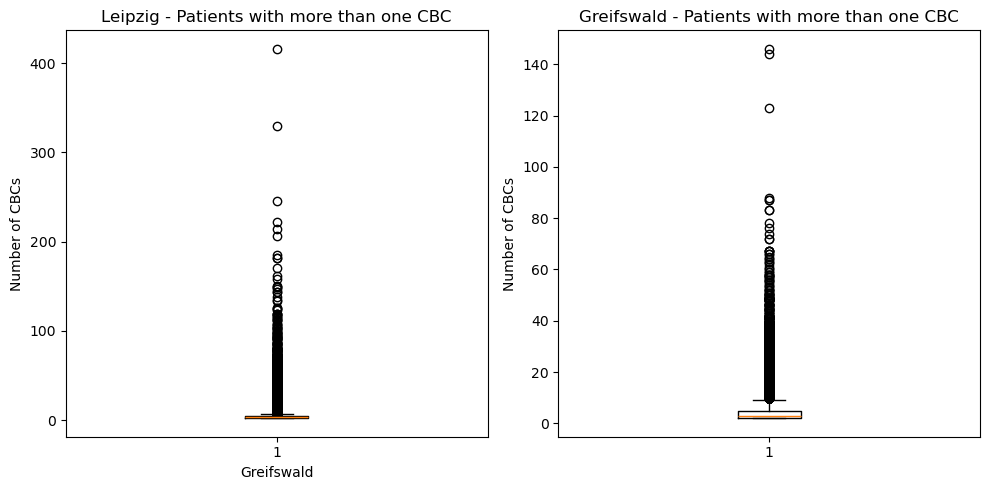

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].boxplot(leip_more_than_one)
ax[0].set_title("Leipzig - Patients with more than one CBC")
ax[0].set_xlabel("Leipzig")
ax[0].set_ylabel("Number of CBCs")


ax[1].boxplot(greif_more_than_one)
ax[1].set_title("Greifswald - Patients with more than one CBC")
ax[0].set_xlabel("Greifswald")
ax[1].set_ylabel("Number of CBCs")

plt.tight_layout()
plt.show()


For both centers there are a very large number of patients with more than one CBC/row in the data. 
In some cases there are hundereds of bloodtests in the data for a single patient. 
Some of these patitents will be only control cases and some will be patients with spesis who have a lot 
of blood test data available from before they went into the ICU. 

The box plots are a little hard to read. How does this look in a bar chart? 

In [24]:
def find_percent(subset, data, num_places):
    '''This function calcualtes what percent 
    a subset of data is of the full data set.

    subset: an int corresponding the to the number of points in the portion 
    of the data that we want the percent of.

    data: an int corresponding to the total number of data points

    num_places): an int cooresponding to the desired number of decimal places to round to.
    '''

    try:
        sub = len(subset)
    except:
        sub = subset
        
    full = len(data)

    percent = round((sub/full)*100,num_places)

    return percent

In [25]:
print(len(leipzig_values))

708595


In [26]:
leip_bar_values = []
greif_bar_values = []

leip_bar_values.append((len(leipzig_values[leipzig_values == 1])))
leip_bar_values.append(len(leipzig_values[leipzig_values == 2]))
leip_bar_values.append(len(leipzig_values[(leipzig_values >= 3)&(leipzig_values <=5)]))
leip_bar_values.append(len(leipzig_values[(leipzig_values >= 6)&(leipzig_values <=10)]))
leip_bar_values.append(len(leipzig_values[(leipzig_values >= 11)&(leipzig_values <=19)]))
leip_bar_values.append(len(leipzig_values[(leipzig_values >= 20)]))

greif_bar_values.append(len(greif_values[greif_values == 1]))
greif_bar_values.append(len(greif_values[greif_values == 2]))
greif_bar_values.append(len(greif_values[(greif_values >= 3)&(leipzig_values <=5)]))
greif_bar_values.append(len(greif_values[(greif_values >= 6)&(leipzig_values <=10)]))
greif_bar_values.append(len(greif_values[(greif_values >= 11)&(leipzig_values <=19)]))
greif_bar_values.append(len(greif_values[(greif_values >= 20)]))

In [27]:
leip_bar_values_percent = []
greif_bar_values_percent = []

for item in leip_bar_values:
    percent = find_percent(item,leipzig_values,1)
    leip_bar_values_percent.append(percent)

for item in greif_bar_values:
    percent = find_percent(item,greif_values,1)
    greif_bar_values_percent.append(percent)

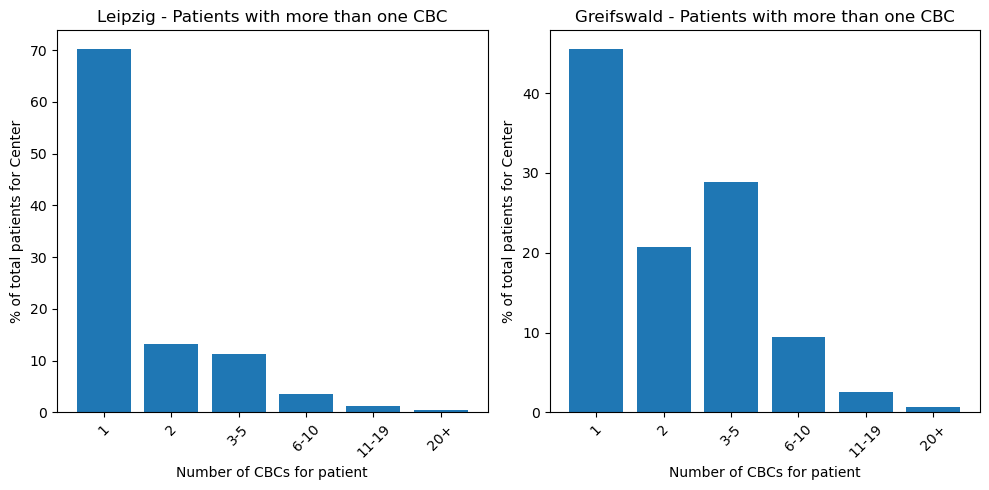

In [28]:
bins = ['1', '2', '3-5', '6-10', '11-19', '20+']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].bar(bins,leip_bar_values_percent)
ax[0].set_title("Leipzig - Patients with more than one CBC")
ax[0].set_xlabel("Number of CBCs for patient")
ax[0].set_ylabel("% of total patients for Center")
ax[0].set_xticks(bins)
ax[0].set_xticklabels(bins, rotation=45)

ax[1].bar(bins,greif_bar_values_percent)
ax[1].set_title("Greifswald - Patients with more than one CBC")
ax[1].set_xlabel("Number of CBCs for patient")
ax[1].set_ylabel("% of total patients for Center")
ax[1].set_xticks(bins)
ax[1].set_xticklabels(bins, rotation=45)

plt.tight_layout()
plt.show()

We can see that patients with more than 5 CBCs in the data are pretty rare, and patients with more than 20 
are very rare. 

The Greifswald center has many fewer patients in the data, and has a higher percentage of patients with 3-5 CBCs
This is unfortunate, because it means that not only is the data set for that center smaller, but the blood work is from fewer patients.

## <a id='toc5_2_'></a>[Age](#toc0_)

In [29]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sbc_df_incl['Age'].describe()

count   1819435.00
mean         58.73
std          18.32
min          18.00
25%          46.00
50%          61.00
75%          73.00
max         106.00
Name: Age, dtype: float64

The prior cleaning eliminated any cases in patients below the age of 18. 

In [30]:
max_age = sbc_df_incl['Age'].max()
min_age = sbc_df_incl['Age'].min()


print(f'The minimum age in the data is {min_age}, the maximum age is {max_age}')
print(f'The range of ages in the data is {max_age - min_age}')


The minimum age in the data is 18, the maximum age is 106
The range of ages in the data is 88


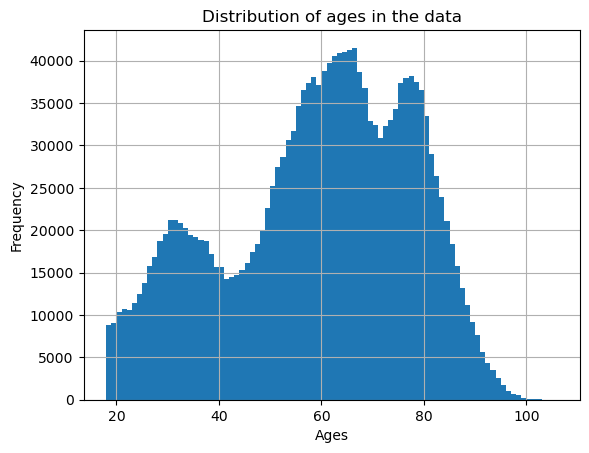

In [31]:
#set the number of bins to the number of years
sbc_df_incl['Age'].hist(bins = 88)

plt.title('Distribution of ages in the data')

plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

Interesting peaks here. There is a good variance in the data in terms of age. It skews older, but that makes
intuitive sense since older people would seem more likely to visit a medical center and therefore become a 
part of the data set. 

But how does age interact with patients labeled as Sepsis

### <a id='toc5_2_1_'></a>[Age and Sepsis Label](#toc0_)

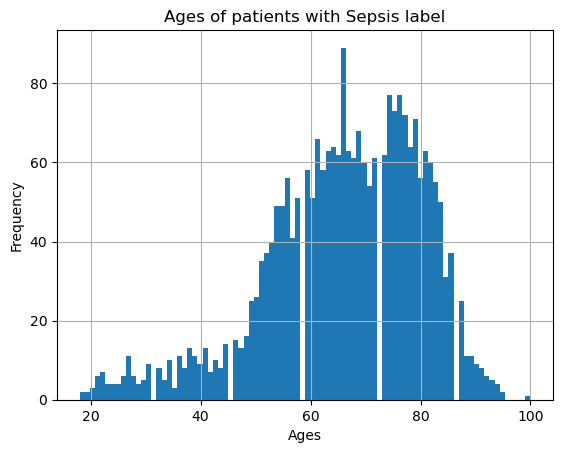

In [32]:
sep = sbc_df_incl[sbc_df_incl['Label']=='Sepsis']
sep['Age'].hist(bins = 88)

plt.title('Ages of patients with Sepsis label')

plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

Looks like the sepsis cases are largely clustered between 60 and roughly 80. 

### <a id='toc5_2_2_'></a>[Age and Center](#toc0_)

In [33]:
leipzig = sbc_df_incl[sbc_df_incl['Center']=='Leipzig']
greifswald = sbc_df_incl[sbc_df_incl['Center']=='Greifswald']

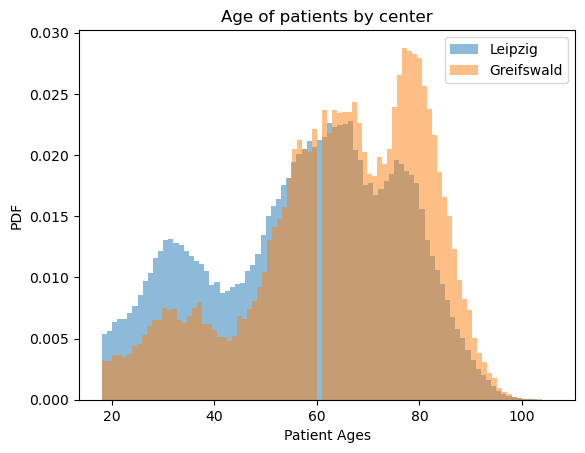

In [34]:
plt.hist(leipzig['Age'], bins=88, alpha=0.5, label='Leipzig', density=True)
plt.hist(greifswald['Age'], bins=88, alpha=0.5, label='Greifswald', density=True)

plt.title('Age of patients by center')

plt.xlabel('Patient Ages')
plt.ylabel('PDF')

plt.legend()
plt.show()

Looks like there are generally older patients in Greifswald. This is likely a function of the population in the area where the center is located. 

## <a id='toc5_3_'></a>[Sex](#toc0_)

In [35]:
male_cases = len(sbc_df_incl[sbc_df_incl['Sex']=='M'])
female_cases = len(sbc_df_incl[sbc_df_incl['Sex']=='W'])
percent_difference = round((male_cases/len(sbc_df_incl)-female_cases/len(sbc_df_incl))*100,2)

print(f'There are {male_cases} cases labeled as male in the data and {female_cases} female cases')
print(f'There are {percent_difference}% more men in the data than women')

There are 918976 cases labeled as male in the data and 900459 female cases
There are 1.02% more men in the data than women


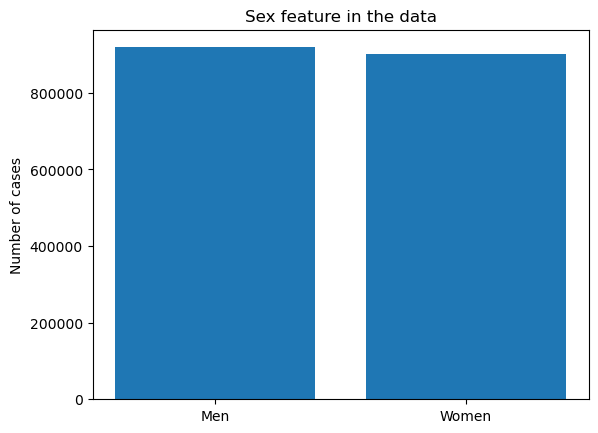

In [36]:
plt.bar(['Men','Women'], [male_cases,female_cases])

plt.title('Sex feature in the data')

plt.ylabel('Number of cases')
plt.show()

Slightly more cases from men in the data, but not by a huge amount at all. About a 1% difference.

There are two centers in the data, which we will likely be treating as separate localities. Does this distribution
of men and women hold for each center? 

### <a id='toc5_3_1_'></a>[Sex and Sepsis Label](#toc0_)

In [37]:
male_cases_sep = len(sbc_df_incl[(sbc_df_incl['Sex']=='M')&(sbc_df_incl['Label']=='Sepsis')])
female_cases_sep = len(sbc_df_incl[(sbc_df_incl['Sex']=='W')&(sbc_df_incl['Label']=='Sepsis')])

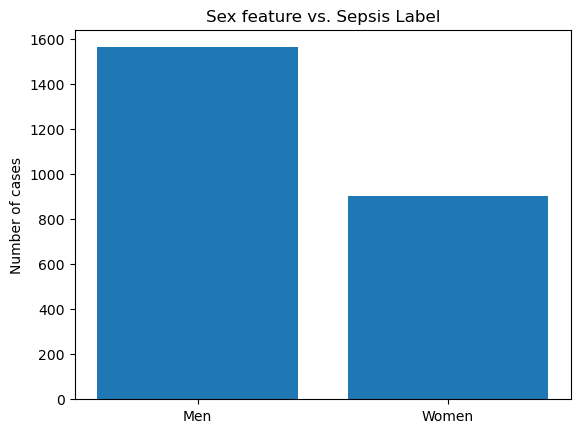

In [38]:
plt.bar(['Men','Women'], [male_cases_sep,female_cases_sep])

plt.title('Sex feature vs. Sepsis Label')

plt.ylabel('Number of cases')
plt.show()

A lot more men than women are labeled as Sepsis in the data. This could mean that any future modeling
is more reflective of sepsis in men than in women. 

### <a id='toc5_3_2_'></a>[Sex and center](#toc0_)

In [39]:
leipzig_sep = leipzig[leipzig['Label']=='Sepsis']
greifswald_sep = greifswald[greifswald['Label']=='Sepsis']

leipzig_sep_men = len(leipzig_sep[leipzig_sep['Sex']=='M'])
leipzig_sep_women = len(leipzig_sep[leipzig_sep['Sex']=='W'])

greifswald_sep_men = len(greifswald_sep[greifswald_sep['Sex']=='M'])
greifswald_sep_women = len(greifswald_sep[greifswald_sep['Sex']=='W'])

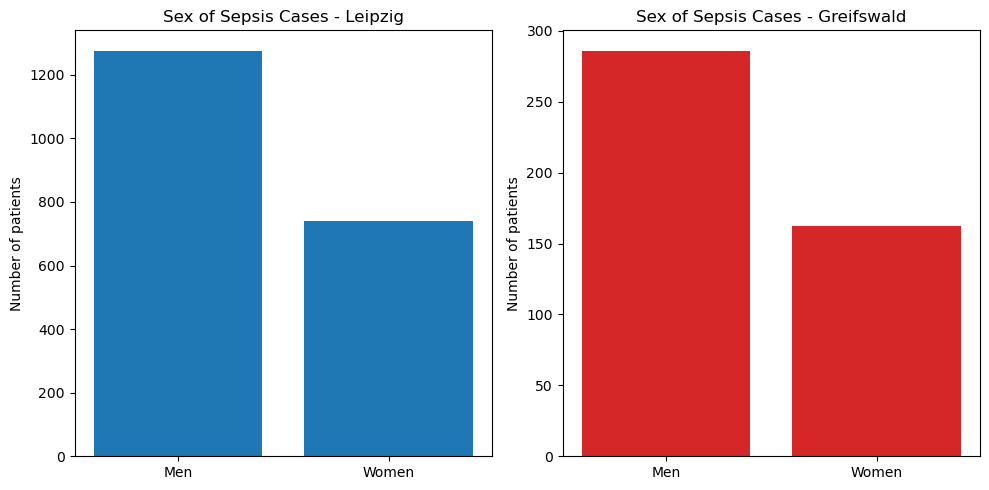

In [40]:
leipzig_sep_men = len(leipzig_sep[leipzig_sep['Sex']=='M'])
leipzig_sep_women = len(leipzig_sep[leipzig_sep['Sex']=='W'])
greifswald_sep_men = len(greifswald_sep[greifswald_sep['Sex']=='M'])
greifswald_sep_women = len(greifswald_sep[greifswald_sep['Sex']=='W'])

#Data
categories = ['Men', 'Women']
values1 = [leipzig_sep_men,leipzig_sep_women ]
values2 = [greifswald_sep_men, greifswald_sep_women]

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Bar chart 1
ax1.bar(categories, values1, color='tab:blue')
ax1.set_title('Sex of Sepsis Cases - Leipzig')
#ax1.set_xlabel('Category')
ax1.set_ylabel('Number of patients')

# Bar chart 2
ax2.bar(categories, values2, color='tab:red')
ax2.set_title('Sex of Sepsis Cases - Greifswald')
#ax2.set_xlabel('Category')
ax2.set_ylabel('Number of patients')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

There are more cases in Leipzig overall, so the scales don't match, but the realtionship between the 
sexes seems to hold for both centers. 

## <a id='toc5_4_'></a>[Diagnosis](#toc0_)

There are two values for the "Diagnosis" feature, 'Control' and 'Sepsis'. However, these values are 
also repeated in the "Label" feature as shown below. Notably, there are thousands of more cases that 
are diagnosed with Sepsis without being labeled as Sepsis. 

According to the paper, the cases that are diagnosed as Sepsis, but not Labeled as Sepsis, should 
Be patients with Sepsis whose CBC data was collected more than 6 hours before ICU admission. 

In [41]:
sbc_df_incl['Diagnosis'].value_counts()

Diagnosis
Control    1798807
Sepsis       20628
Name: count, dtype: int64

In [42]:
sbc_df_incl['Label'].value_counts()

Label
Control    1816971
Sepsis        2464
Name: count, dtype: int64

We see that there are 20,628 cases diagnosed with Sepsis, but only 2464 labeled as Sepsis. 

### <a id='toc5_4_1_'></a>[Cases Labeled as Sepsis](#toc0_)

In [43]:
sbc_df_incl_sep = sbc_df_incl[sbc_df_incl['Label']=='Sepsis']
sbc_df_incl_sep['Diagnosis'].value_counts()

Diagnosis
Sepsis    2464
Name: count, dtype: int64

All the cases labeled as Sepsis have a Sepsis Diagnosis

In [44]:
in_icu = 0
six_or_less_to_icu = 0
six_to_72_to_icu = 0
over_72_to_icu = 0
other = 0

for item in sbc_df_incl_sep['SecToIcu']:
    if item < 0:
       in_icu += 1

    elif item <=  21600:
        six_or_less_to_icu += 1
   
    elif item > 21600 and item <= 259200:
        six_to_72_to_icu +=1
    
    elif item > 259200:
        over_72_to_icu += 1

    else: 
        other += 1

print('For cases labeled as Sepsis:')
print(f'{in_icu} cases in ICU.')
print(f'{six_or_less_to_icu} cases w/ in 6 hours of ICU.')
print(f'{six_to_72_to_icu} cases between 6 and 72 hours of ICU.')
print(f'{over_72_to_icu} cases over 72 hours from ICU.')
print(f'{other} other cases.')  
    

For cases labeled as Sepsis:
0 cases in ICU.
2464 cases w/ in 6 hours of ICU.
0 cases between 6 and 72 hours of ICU.
0 cases over 72 hours from ICU.
0 other cases.


All the cases labeled as Sepsis also have CBC data from a 6 hour window prior to ICU admission.

### <a id='toc5_4_2_'></a>[Cases diagnosed, but not Labeled as Sepsis](#toc0_)

In [45]:
sbc_df_incl_diag_sep = sbc_df_incl[(sbc_df_incl['Diagnosis']=='Sepsis')&(sbc_df_incl['Label']!='Sepsis')]

In [46]:
null_count = sbc_df_incl_diag_sep['SecToIcu'].isna().sum()
print(f'The number of NaN values in SecToIcu is {null_count}')

The number of NaN values in SecToIcu is 0


All cases with a sepsis diagnosis visited the ICU at some point. They all have a value for time to ICU admission

In [47]:
in_icu = 0
six_or_less_to_icu = 0
six_to_72_to_icu = 0
over_72_to_icu = 0
other = 0
null = 0

for item in sbc_df_incl_diag_sep['SecToIcu']:
    if pd.isna(item):
        null += 1
    
    elif item < 0:
       in_icu += 1

    elif item <=  21600:
        six_or_less_to_icu += 1
   
    elif item > 21600 and item <= 259200:
        six_to_72_to_icu +=1
    
    elif item > 259200:
        over_72_to_icu += 1

    else: 
        other += 1
        print(item)

print('For cases Diagnosed but not labeled as Sepsis:')
print(f'{in_icu} cases in ICU')
print(f'{six_or_less_to_icu} cases w/ in 6 hours of ICU')
print(f'{six_to_72_to_icu} cases between 6 and 72 hours of ICU')
print(f'{over_72_to_icu} cases over 72 hours from ICU')
print(f'{other} other cases.')  
print(f'{null} cases have no ICU admission recorded')

For cases Diagnosed but not labeled as Sepsis:
0 cases in ICU
0 cases w/ in 6 hours of ICU
3727 cases between 6 and 72 hours of ICU
14437 cases over 72 hours from ICU
0 other cases.
0 cases have no ICU admission recorded


All the cases with a Sepsis Diagnosis, but not a Sepsis Label have blood work collected more than 6 hours from ICU admission. 
The decision to use a 6 hour window for labeling purposes was made by the publishers during data cleaning. It could be that using a 
larger window will yield better results. There is certainly a lot more training data to be had if a larger window is used. 

### <a id='toc5_4_3_'></a>[Sepsis Diagnosis and time from ICU admission - regardless of label](#toc0_)

The time to ICU admission is measured in seconds, so below we'll have to conver those second counts into hours to better understand
how the data breaks down. 

In [48]:
def sec_to_hours(seconds):
    hours = round(seconds/3600,2)
    return hours

In [49]:
all_sep_cases = sbc_df_incl[(sbc_df_incl['Diagnosis']=='Sepsis')]

hours_from_icu = []

#loop through all the cases with a diagniosis of sepsis
for value in all_sep_cases['SecToIcu']:
    hours_from_icu.append(sec_to_hours(value))

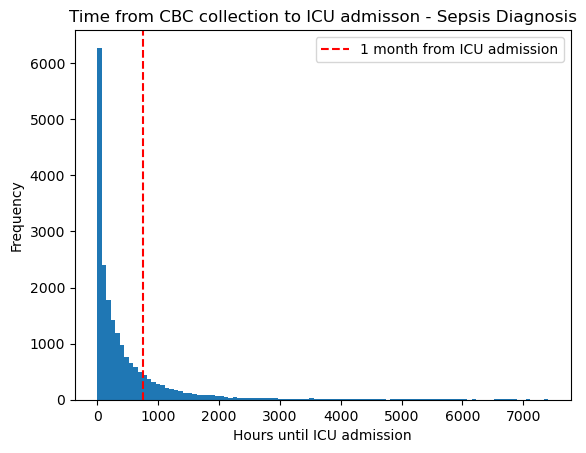

In [50]:
plt.hist(hours_from_icu, bins = 100)

plt.title('Time from CBC collection to ICU admisson - Sepsis Diagnosis')

plt.axvline(744,color='r' ,linestyle='--', label = '1 month from ICU admission')

plt.xlabel('Hours until ICU admission')
plt.ylabel('Frequency')

plt.legend()

plt.show()

There are a lot of cases that eventually ended up in the ICU but where the CBC data was taken days or months before that happened. 
This sheds a lot of light on why the publishers limited the time window for labled cases to 6 hours. Let's look at the cases within a 24 hour period.

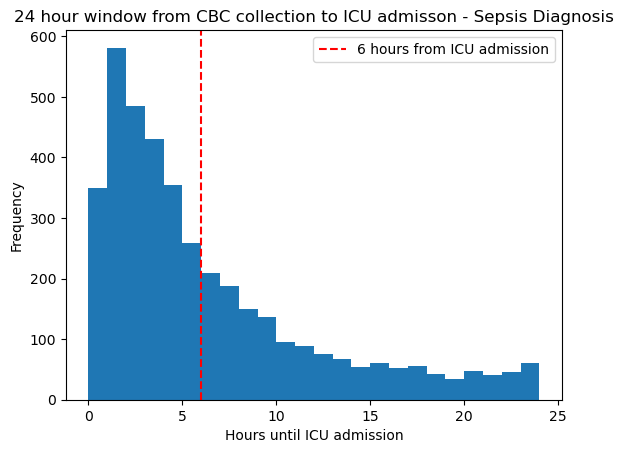

In [51]:
cbc_within_24h = [item for item in hours_from_icu if item <= 24]

plt.hist(cbc_within_24h, bins = 24)

plt.title('24 hour window from CBC collection to ICU admisson - Sepsis Diagnosis')

plt.axvline(6,color='r' ,linestyle='--', label = '6 hours from ICU admission')

plt.xlabel('Hours until ICU admission')
plt.ylabel('Frequency')

plt.legend()

plt.show()

In [52]:
print(f'By limiting the cases to a 12 hour period before ICU admission, we can look at {len([item for item in cbc_within_24h if item <=12])-2016} additional cases.')
print(f'By limiting the cases to a 24 hour period before ICU admission, we can look at {len(cbc_within_24h)-2016} additional cases.')



By limiting the cases to a 12 hour period before ICU admission, we can look at 1310 additional cases.
By limiting the cases to a 24 hour period before ICU admission, we can look at 1946 additional cases.


It looks like we can gain a significant amount of additional training data by expanding the window for cases labeled as Sepsis. 
There is a significant class imbalance in this data set, so this could be very useful in terms of giving the model more exposure to
exampled of cases with a Sepsis diagnosis. It's possible that the CBC data that far out from ICU admission won't help the model in prediction,
but it seems worth a try.  

## <a id='toc5_5_'></a>[Center](#toc0_)

The center feature corresponds to which medical center a particular row was sourced from. 

In [53]:
sbc_df_incl['Center'].unique()

array(['Greifswald', 'Leipzig'], dtype=object)

In [54]:
rows_leipzig = len(sbc_df_incl[sbc_df_incl['Center']=='Leipzig'])
rows_greifswald = len(sbc_df_incl[sbc_df_incl['Center']=='Greifswald'])

print(f'There are {rows_leipzig} cases from the Liepzig center and {rows_greifswald} cases from the Greifswald center.')

There are 1381358 cases from the Liepzig center and 438077 cases from the Greifswald center.


Looks like a little more than 3x as much data from Leipzig as from Greifswald. 


### <a id='toc5_5_1_'></a>[Centers broken down by class label](#toc0_)

How do the Sepsis and control labels currently in the data break down by center

In [55]:
total_cases_leipzig = len(sbc_df_incl[sbc_df_incl['Center']=='Leipzig'])
leipzig_sepsis = len(sbc_df_incl[(sbc_df_incl['Center']=='Leipzig')&(sbc_df_incl['Label']=='Sepsis')])
leipzig_control = len(sbc_df_incl[(sbc_df_incl['Center']=='Leipzig')&(sbc_df_incl['Label']=='Control')])

total_cases_greifswald = len(sbc_df_incl[sbc_df_incl['Center']=='Greifswald'])
greifswald_sepsis = len(sbc_df_incl[(sbc_df_incl['Center']=='Greifswald')&(sbc_df_incl['Label']=='Sepsis')])
greifswald_control = len(sbc_df_incl[(sbc_df_incl['Center']=='Greifswald')&(sbc_df_incl['Label']=='Control')])

print(f'Leipzig has {leipzig_sepsis} cases labeled sepsis and {leipzig_control} cases labeled as control')
print(f'Greifswald has {greifswald_sepsis} cases labeled sepsis and {greifswald_control} cases labeled as control')
print('\n')
print(f'The Sepsis class makes up {round(leipzig_sepsis/total_cases_leipzig,5)}% of cases for Leipzig')
print(f'The Sepsis class makes up {round(greifswald_sepsis/total_cases_greifswald,5)}% of cases for Greifswald')

Leipzig has 2016 cases labeled sepsis and 1379342 cases labeled as control
Greifswald has 448 cases labeled sepsis and 437629 cases labeled as control


The Sepsis class makes up 0.00146% of cases for Leipzig
The Sepsis class makes up 0.00102% of cases for Greifswald


This is a pretty big class imbalance. The class being targeted is well under 1% of the total data in each center.

### <a id='toc5_5_2_'></a>[Centers broken down by class diagnosis - 24 hour window](#toc0_)

We know the Sepsis labels provided by the publishers contain a subset of the total sepsis cases in the data. 
How do the centers look if we were to look at sepsis cases with blood tests within 24 hours instead of 6

In [56]:
leipzig_24_hour_cases = len(sbc_df_incl[(sbc_df_incl['Center']=='Leipzig')&(sbc_df_incl['Diagnosis']=='Sepsis')&(sbc_df_incl['SecToIcu']<=86400)])
greifswald_24_hour_cases = len(sbc_df_incl[(sbc_df_incl['Center']=='Greifswald')&(sbc_df_incl['Diagnosis']=='Sepsis')&(sbc_df_incl['SecToIcu']<=86400)])

print(f'The Sepsis class makes up {round(leipzig_24_hour_cases/total_cases_leipzig,5)}% of cases for Leipzig if a 24 hour window is considered')
print(f'The Sepsis class makes up {round(greifswald_24_hour_cases/total_cases_greifswald,5)}% of cases for Greifswaldif a 24 hour window is considered')

The Sepsis class makes up 0.00226% of cases for Leipzig if a 24 hour window is considered
The Sepsis class makes up 0.00192% of cases for Greifswaldif a 24 hour window is considered


We're getting a lot more data here, but it doesn't make a big difference in the class imbalance at all. 
What if we try a 72 hour window?

### <a id='toc5_5_3_'></a>[Centers broken down by class diagnosis - 72 hour window](#toc0_)

In [57]:
leipzig_72_hour_cases = len(sbc_df_incl[(sbc_df_incl['Center']=='Leipzig')&(sbc_df_incl['Diagnosis']=='Sepsis')&(sbc_df_incl['SecToIcu']<=259200)])
greifswald_72_hour_cases = len(sbc_df_incl[(sbc_df_incl['Center']=='Greifswald')&(sbc_df_incl['Diagnosis']=='Sepsis')&(sbc_df_incl['SecToIcu']<=259200)])

print(f'The Sepsis class makes up {round(leipzig_72_hour_cases/total_cases_leipzig,5)}% of cases for Leipzig if a 72 hour window is considered')
print(f'The Sepsis class makes up {round(greifswald_72_hour_cases/total_cases_greifswald,5)}% of cases for Greifswaldif a 72 hour window is considered')

The Sepsis class makes up 0.00344% of cases for Leipzig if a 72 hour window is considered
The Sepsis class makes up 0.00328% of cases for Greifswaldif a 72 hour window is considered


When considering 72 hours, we get 2x or 3x as much data in the minority class, but it's still well under 1%. 
It's also not clear that the bloodwork that far out will contain information that will improve predicition performance.
Some experimentation with model performance seems necessary. 

## <a id='toc5_6_'></a>[Set](#toc0_)

The set feature is the category that the publishers of the paper used for a particular row when training and testing their model. 
Their appraoch was to train and validate the model on the Leipzig data, and use all the data from the Greifswald center as a test set. 
They also tested their model on another dataset from MIMIC IV (https://physionet.org/content/mimiciv/1.0/) which is not available as part 
this project. 

In [58]:
leipzig_df = sbc_df_incl[sbc_df_incl['Center']=='Leipzig']
leipzig_df['Set'].value_counts()

Set
Training      1015074
Validation     366284
Name: count, dtype: int64

In [59]:
greifswald_df = sbc_df_incl[sbc_df_incl['Center']=='Greifswald']
greifswald_df['Set'].value_counts()

Set
Validation    438077
Name: count, dtype: int64

The prior modeling efforts used about 36% of the data from Leipzig as a validation set and trained on the remaining 64%
Griefswald is all validation set because it was only used for testing the models. 

This is interesting in that it tells us something about the prior modeling approach and how they obtained their results. 
It's not necessarily the optimal approach or one that needs to be followed in this project. 

It could serve as a good reference if direct comparisons between this project and the previous modeling efforts are desired.

## <a id='toc5_7_'></a>[Sender](#toc0_)

The sender feature is an object that specifies the sender of a particular blood sample to a laboratory for testing. This feature could be of interest in some settings, but it does seem limited as a general feature because the sender information is limited to a specific country and specific medical facilities.

The focus here is on what the blood test values can tell us about which patients will get sepsis or not in the near future. The sender feature does not appear to be particularly relevant in this context and may be dropped later.

In [60]:
sbc_df_incl['Sender'].unique()

array(['AMB', 'GEN', 'OTHER', 'ED', 'CIMC', 'OR', 'NIMC', 'OP', 'SIMC',
       'STUD', 'MIMC', 'PIMC'], dtype=object)

## <a id='toc5_8_'></a>[Episode](#toc0_)

The episode feature is a counter for episodes in intensive care units. If a patient had more than one,
the publishers used the first episode and discarded the data from the subsequent episoded. 
I wasn't able to determine the exact reasoning behind this, but my assumption was that the actions 
taken within the ICU after the first admission would have been a confounding factor.

Since all the values in the included data are the same, this column can likely be dropped. 

In [61]:
#The data without the exclusions contains a large variance in the Episode Value
sbc_df['Episode'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

In [62]:
#All the episodes after the first one are marked as excluded.
multi_episodes = sbc_df[sbc_df['Episode']>1]
multi_episodes['Excluded'].unique()

array([ True])

In [63]:
#After removing episodes labeled as excluded - all the episode numbers are the same (1).
sbc_df_incl['Episode'].unique()

array([1])

## <a id='toc5_9_'></a>[Time](#toc0_)

This is the realtive time (in seconds) when a blood sample was analyzed. The first sample is marked as 0 and 
any other samples taken thereafter are marked with the time after the first sample.
So for any case with more than one row in the data, the blood samples can plotted in time.

In [64]:
#Take the id that has the most rows from the Leipzig data
time_example = sbc_df_incl[sbc_df_incl['Id']==195714]
time_example.head()

,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,TargetIcu,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label
778815,195714,64,W,Sepsis,Leipzig,Training,GEN,1,0.00,MICU,26672100.00,162.31,4.80,81.80,NaN,272.00,2.92,2.10,Control
778816,195714,64,W,Sepsis,Leipzig,Training,GEN,1,43560.00,MICU,26628540.00,134.46,4.70,81.10,NaN,266.00,2.85,2.20,Control
778817,195714,64,W,Sepsis,Leipzig,Training,GEN,1,132540.00,MICU,26539560.00,NaN,5.10,82.50,NaN,275.00,3.03,2.20,Control
778818,195714,64,W,Sepsis,Leipzig,Training,GEN,1,217500.00,MICU,26454600.00,58.71,4.80,81.70,NaN,277.00,2.89,2.00,Control
778819,195714,64,W,Sepsis,Leipzig,Training,GEN,1,305160.00,MICU,26366940.00,NaN,4.80,82.60,NaN,252.00,2.93,1.90,Control


In [65]:
#sort the data by time
time_example_sorted = time_example.sort_values(by = 'Time')
time_example_sorted.head()

,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,TargetIcu,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label
778815,195714,64,W,Sepsis,Leipzig,Training,GEN,1,0.00,MICU,26672100.00,162.31,4.80,81.80,NaN,272.00,2.92,2.10,Control
778816,195714,64,W,Sepsis,Leipzig,Training,GEN,1,43560.00,MICU,26628540.00,134.46,4.70,81.10,NaN,266.00,2.85,2.20,Control
778817,195714,64,W,Sepsis,Leipzig,Training,GEN,1,132540.00,MICU,26539560.00,NaN,5.10,82.50,NaN,275.00,3.03,2.20,Control
778818,195714,64,W,Sepsis,Leipzig,Training,GEN,1,217500.00,MICU,26454600.00,58.71,4.80,81.70,NaN,277.00,2.89,2.00,Control
778819,195714,64,W,Sepsis,Leipzig,Training,GEN,1,305160.00,MICU,26366940.00,NaN,4.80,82.60,NaN,252.00,2.93,1.90,Control


In [66]:
#Convert time in seconds to time in hours
time_example_sorted['Time'] = time_example_sorted['Time'].apply(sec_to_hours)
time_example_sorted.head()

,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,TargetIcu,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label
778815,195714,64,W,Sepsis,Leipzig,Training,GEN,1,0.00,MICU,26672100.00,162.31,4.80,81.80,NaN,272.00,2.92,2.10,Control
778816,195714,64,W,Sepsis,Leipzig,Training,GEN,1,12.10,MICU,26628540.00,134.46,4.70,81.10,NaN,266.00,2.85,2.20,Control
778817,195714,64,W,Sepsis,Leipzig,Training,GEN,1,36.82,MICU,26539560.00,NaN,5.10,82.50,NaN,275.00,3.03,2.20,Control
778818,195714,64,W,Sepsis,Leipzig,Training,GEN,1,60.42,MICU,26454600.00,58.71,4.80,81.70,NaN,277.00,2.89,2.00,Control
778819,195714,64,W,Sepsis,Leipzig,Training,GEN,1,84.77,MICU,26366940.00,NaN,4.80,82.60,NaN,252.00,2.93,1.90,Control


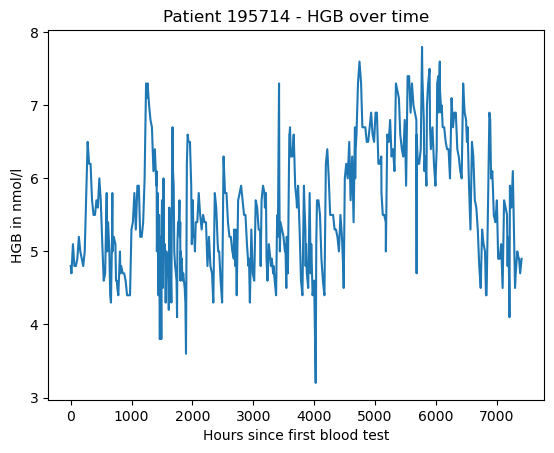

In [67]:
#plot 'HGB' blood test level over 'Time'

plt.plot(time_example_sorted['Time'], time_example_sorted['HGB'])

plt.title('Patient 195714 - HGB over time')
plt.xlabel('Hours since first blood test')
plt.ylabel('HGB in nmol/l')


plt.show()

The above is just an example, it's also the case with the most blood test data in the data set.
Even so, it brings up the possibility of a time series appraoch to patients where there is a lot of data. 
My intuition is that there isn't enough data like this to make a really good model, but it might be worth exploring.

## <a id='toc5_10_'></a>[TargetIcu](#toc0_)

This is the name/ type of ICU here the patient has been has to be admitted. These are all medical ICUs:

Surgical Intensive Care Unit (SICU)

Medical Intensive Care Unit (MICU)

Neonatal Intensive Care Unit (NICU/PICU)

The data indicates that patients that were admitted ot Intermediate ICUs, Emergency deaprtments and other non-meidcal ICU's 
were eliminated from the dataset during cleaning. 

In [68]:
sbc_df['TargetIcu'].unique()

array([nan, 'SICU', 'MICU', 'PICU', 'NICU'], dtype=object)

In [69]:
sbc_df_incl['TargetIcu'].unique()

array([nan, 'SICU', 'MICU', 'PICU', 'NICU'], dtype=object)

The labeled and unlabeled data contain the same ICU names, indicating that any other ICU values were excluded prior to the labeling. 
The documentation (see references/icumap.csv) contains multiple other values for this that don't appear.

For the purposes of this project, the most important info imparted by this feature is that the 
data has been cleaned to exclude some ICU's. All the ICU values here appear to be about equal in terms of 
severity based on the documentation. 

It's beyond the scope fo this project to comment on outcomes in specific ICU's in Germany, so this is another column that might be dropped.

## <a id='toc5_11_'></a>[SecToIcu](#toc0_)

This is the time in seconds until the patient/case has to be admitted to the ` TargetIcu' intensive care unit. This time is negative if the patient/case is already on the
intensive care unit. 

This feature will allow the blood test data to be subset based on various lengths of time from ICU admission. 
This is already explored in some depth above under the diagnosis feature. 

I'll just put an example here using the data from patient 195714. 

In [70]:
sectoIcu_example = sbc_df_incl[sbc_df_incl['Id']==195714]

In [71]:
sectoIcu_example['HoursToIcu'] = sectoIcu_example['SecToIcu']/3600
sectoIcu_example.head()

/var/folders/wk/9x4cvkhj61g2ldtvc6ss48wc0000gn/T/ipykernel_33533/1046323482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sectoIcu_example['HoursToIcu'] = sectoIcu_example['SecToIcu']/3600


,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,TargetIcu,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label,HoursToIcu
778815,195714,64,W,Sepsis,Leipzig,Training,GEN,1,0.00,MICU,26672100.00,162.31,4.80,81.80,NaN,272.00,2.92,2.10,Control,7408.92
778816,195714,64,W,Sepsis,Leipzig,Training,GEN,1,43560.00,MICU,26628540.00,134.46,4.70,81.10,NaN,266.00,2.85,2.20,Control,7396.82
778817,195714,64,W,Sepsis,Leipzig,Training,GEN,1,132540.00,MICU,26539560.00,NaN,5.10,82.50,NaN,275.00,3.03,2.20,Control,7372.10
778818,195714,64,W,Sepsis,Leipzig,Training,GEN,1,217500.00,MICU,26454600.00,58.71,4.80,81.70,NaN,277.00,2.89,2.00,Control,7348.50
778819,195714,64,W,Sepsis,Leipzig,Training,GEN,1,305160.00,MICU,26366940.00,NaN,4.80,82.60,NaN,252.00,2.93,1.90,Control,7324.15


In [72]:
sectoIcu_example_sorted = sectoIcu_example.sort_values(by ='HoursToIcu',ascending=False)
sectoIcu_example_sorted.head()

,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,TargetIcu,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label,HoursToIcu
778815,195714,64,W,Sepsis,Leipzig,Training,GEN,1,0.00,MICU,26672100.00,162.31,4.80,81.80,NaN,272.00,2.92,2.10,Control,7408.92
778816,195714,64,W,Sepsis,Leipzig,Training,GEN,1,43560.00,MICU,26628540.00,134.46,4.70,81.10,NaN,266.00,2.85,2.20,Control,7396.82
778817,195714,64,W,Sepsis,Leipzig,Training,GEN,1,132540.00,MICU,26539560.00,NaN,5.10,82.50,NaN,275.00,3.03,2.20,Control,7372.10
778818,195714,64,W,Sepsis,Leipzig,Training,GEN,1,217500.00,MICU,26454600.00,58.71,4.80,81.70,NaN,277.00,2.89,2.00,Control,7348.50
778819,195714,64,W,Sepsis,Leipzig,Training,GEN,1,305160.00,MICU,26366940.00,NaN,4.80,82.60,NaN,252.00,2.93,1.90,Control,7324.15


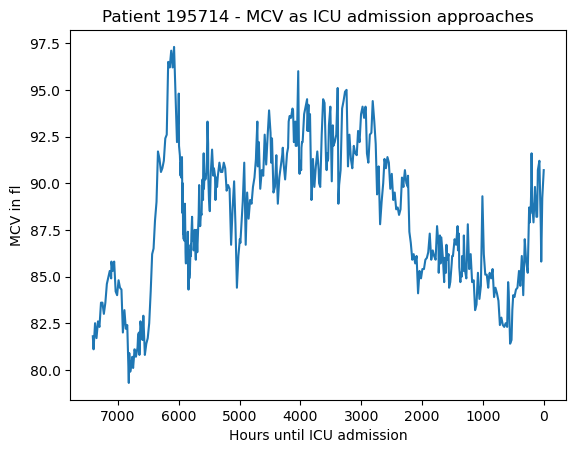

In [73]:
#plot 'MCV' blood test level over 'Hours_to_ICU

plt.plot(sectoIcu_example_sorted['HoursToIcu'], sectoIcu_example_sorted['MCV'])

plt.title('Patient 195714 - MCV as ICU admission approaches')
plt.xlabel('Hours until ICU admission')
plt.ylabel('MCV in fl')

plt.gca().invert_xaxis()
plt.show()

## <a id='toc5_12_'></a>[Blood Test Features](#toc0_)

The below are analyses of features from individual blood test values. In comparing the Sepsis and Control labels, it's important
to keep a couple of things in mind.

1. The labels for Sepsis all reflect a 6 hour window prior to ICU admission. Using other windows could 
   change the distribution of the data by adding more Sepsis labeled points

2. The n for the Sepsis Label is much much smaller than for the control label. The comparisons
   here are not between distributions with equal sample sizes.

In [74]:
#define Sepsis and Control label groups for exploraiton of blood test features.

sepsis_label_df = sbc_df_incl[sbc_df_incl['Label']=='Sepsis']
control_label_df = sbc_df_incl[sbc_df_incl['Label']=='Control']

### <a id='toc5_12_1_'></a>[CRP](#toc0_)

C-reactive protein in mg/l. Your liver releases CRP into your bloodstream in response to inflammation.
Moderately to severely elevated levels may be a sign of a serious infection or other inflammatory condition (https://my.clevelandclinic.org/health/diagnostics/23056-c-reactive-protein-crp-test)

This blood test is not part of the CBC. It's included for some patients but null for others. 

In [75]:
#Looking at full data set
sbc_df_incl['CRP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1819435 entries, 0 to 1819434
Series name: CRP
Non-Null Count    Dtype  
--------------    -----  
1160718 non-null  float64
dtypes: float64(1)
memory usage: 13.9 MB


There are a lot of patients where we don't have data for this feature. About 63.7% of the cases have info for the CRP feature

In [76]:
#Looking at full data set
sbc_df_incl['CRP'].describe()

count   1160718.00
mean         33.67
std          54.04
min           0.00
25%           3.01
50%          10.10
75%          40.06
max         737.86
Name: CRP, dtype: float64

In [77]:
#Remove null values for boxplot

crp_values_sepsis = sepsis_label_df[sepsis_label_df['CRP'].notnull()]
crp_values_control = control_label_df[control_label_df['CRP'].notnull()]

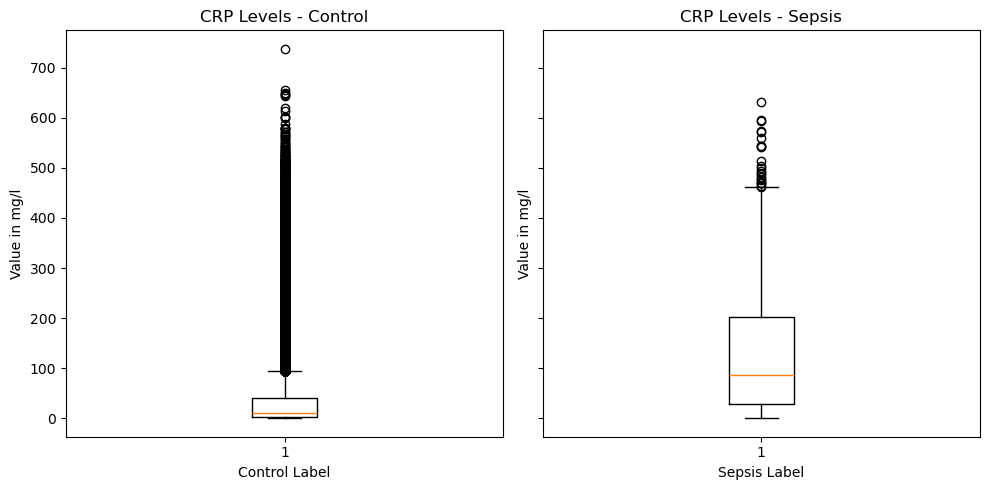

In [78]:
#Plot Sepsis and Control labels

fig, ax = plt.subplots(1, 2, figsize=(10, 5),sharey=True)

ax[0].boxplot(crp_values_control['CRP'])
ax[0].set_title("CRP Levels - Control")
ax[0].set_xlabel("Control Label")
ax[0].set_ylabel("Value in mg/l")


ax[1].boxplot(crp_values_sepsis['CRP'])
ax[1].set_title("CRP Levels - Sepsis")
ax[1].set_xlabel("Sepsis Label")
ax[1].set_ylabel("Value in mg/l")

plt.tight_layout()
plt.show()

A lot of variation here and a pretty skewed distribution for this feature. Most values are between 3 and 40, but some values are as high as 700+
Based on some cursory research (https://www.ncbi.nlm.nih.gov/books/NBK441843/#:~:text=Interpretation%20of%20CRP%20levels%3A,smoking%2C%20and%20genetic%20polymorphisms).

A normal CRP level in a healthy adult is somewhere between 3 and 10 mg/l.
This data- for the patients where we have this measurement skews high. 
One reason for that might be that this test is ordered separately from the normal CBC panel. 
So it would be orders in cases where there was suspicion of a problem.


Based on the box plots it looks like the distribution of CRP levels in cases labeled as Sepsis is shifted into the higher ranges.  

### <a id='toc5_12_2_'></a>[HGB](#toc0_)

Hemoglobin in mmol/l.


Hemoglobin is a protein that’s the main component of red blood cells (erythrocytes). Hemoglobin contains iron, which allows it to bind to oxygen.
Having low hemoglobin or too few red blood cells (RBC) can deprive your tissues and organs of the oxygen they need to make energy and keep you healthy.
Having high hemoglobin or too many red blood cells can cause your blood to thicken and become sluggish. Thick blood doesn’t flow as quickly, depriving your organs of oxygen.
(https://my.clevelandclinic.org/health/diagnostics/17790-hemoglobin-test)


This test is included in the CBC.

In [79]:
#Looking at full data set
sbc_df_incl['HGB'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 1819435 entries, 0 to 1819434
Series name: HGB
Non-Null Count    Dtype  
--------------    -----  
1819435 non-null  float64
dtypes: float64(1)
memory usage: 13.9 MB


In [80]:
#Looking at full data set
sbc_df_incl['HGB'].describe()

count   1819435.00
mean          7.49
std           1.51
min           0.10
25%           6.40
50%           7.70
75%           8.60
max          15.00
Name: HGB, dtype: float64

No null values and a much tigher distribution over all. 

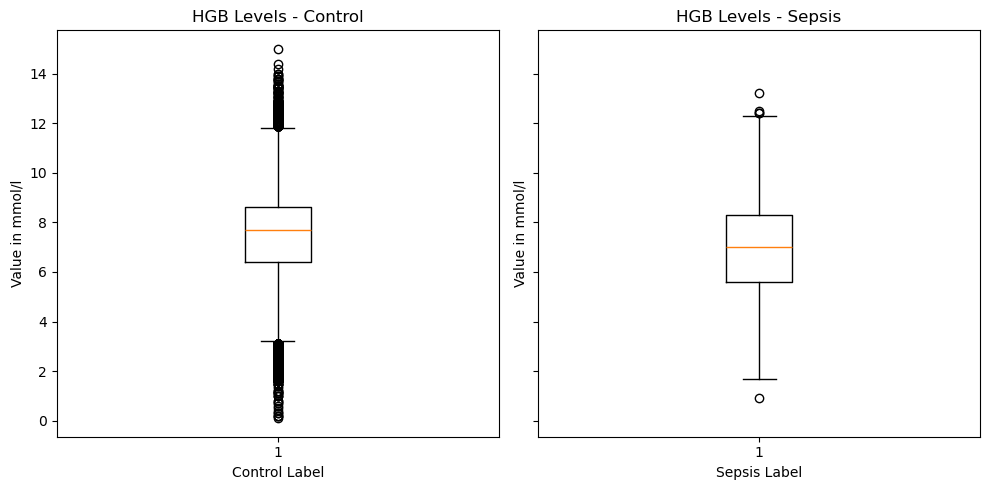

In [81]:
#Plot Sepsis and Control labels

fig, ax = plt.subplots(1, 2, figsize=(10, 5),sharey=True)

ax[0].boxplot(control_label_df['HGB'])
ax[0].set_title("HGB Levels - Control")
ax[0].set_xlabel("Control Label")
ax[0].set_ylabel("Value in mmol/l")


ax[1].boxplot(sepsis_label_df['HGB'])
ax[1].set_title("HGB Levels - Sepsis")
ax[1].set_xlabel("Sepsis Label")
ax[1].set_ylabel("Value in mmol/l")

plt.tight_layout()
plt.show()

Almost a normal distribution here. Outliers above and below the mean for the control label.
The sepsis label also looks normal but it's more spread out. The Standard deviation looks higher, but the central
tendency is about the same. 

### <a id='toc5_12_3_'></a>[MCV](#toc0_)

Mean corpuscular volume in fl (femtoliter)


This is the average size of your red blood cells. The characteristics of your red blood cells — including size — provide information about how successfully they can transport oxygen.
(https://my.clevelandclinic.org/health/diagnostics/24641-mcv-blood-test)

This test is included in the CBC

In [82]:
#Looking at full data set
sbc_df_incl['MCV'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 1819435 entries, 0 to 1819434
Series name: MCV
Non-Null Count    Dtype  
--------------    -----  
1819435 non-null  float64
dtypes: float64(1)
memory usage: 13.9 MB


In [83]:
#Looking at full data set
sbc_df_incl['MCV'].describe()

count   1819435.00
mean         88.68
std           6.29
min          10.90
25%          85.00
50%          88.50
75%          92.20
max         155.70
Name: MCV, dtype: float64

No null values, but a lot more range than HGB for this one. 

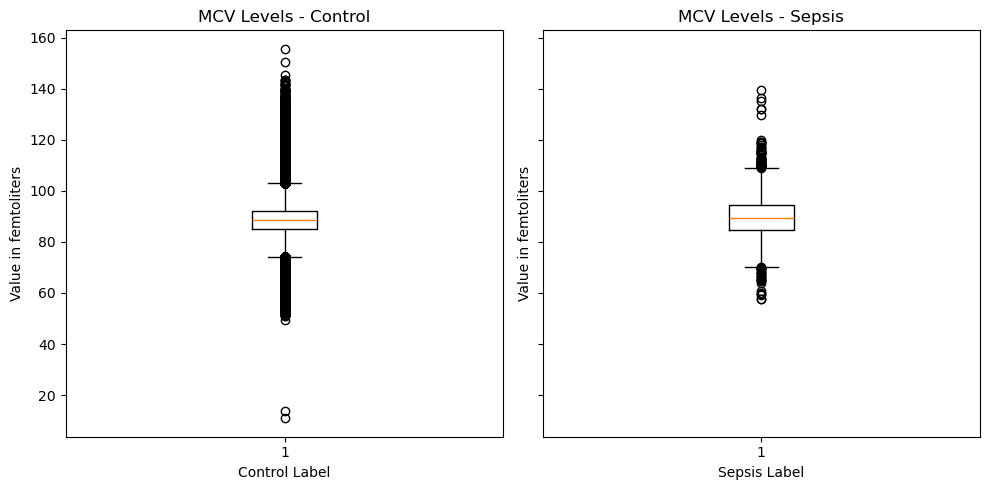

In [84]:
#Plot Sepsis and Control labels

fig, ax = plt.subplots(1, 2, figsize=(10, 5),sharey=True)

ax[0].boxplot(control_label_df['MCV'])
ax[0].set_title("MCV Levels - Control")
ax[0].set_xlabel("Control Label")
ax[0].set_ylabel("Value in femtoliters")


ax[1].boxplot(sepsis_label_df['MCV'])
ax[1].set_title("MCV Levels - Sepsis")
ax[1].set_xlabel("Sepsis Label")
ax[1].set_ylabel("Value in femtoliters")

plt.tight_layout()
plt.show()


Both realtively normal distributions, with some skew to the right. The sepsis distribution looks a little 
different but it's important to remember that there are many many fewer samples for sepsis, so there might
be a slight difference, or the distirbution might be essentially the same and we're just seeing a smaller piece
of it through the sepsis data we have. 

### <a id='toc5_12_4_'></a>[PCT](#toc0_)

Procalcitonin in Gpt/l. 


PCT is a biomarker specific for bacterial infections. In the presence of bacterial infection, PCT increases, and the degree of rise correlates with the severity of the infection. Patients with localised infection have smaller increases of PCT in comparison to those with generalised sepsis, severe sepsis and septic shock. A declining concentration usually reflects resolution of disease. 


This blood test is not part of the CBC. It's included for some patients but null for others. 

In [85]:
#Looking at full data set
sbc_df_incl['PCT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1819435 entries, 0 to 1819434
Series name: PCT
Non-Null Count  Dtype  
--------------  -----  
45234 non-null  float64
dtypes: float64(1)
memory usage: 13.9 MB


In [86]:
#Looking at full data set
sbc_df_incl['PCT'].describe()

count   45234.00
mean        1.78
std        12.53
min         0.00
25%         0.08
50%         0.14
75%         0.43
max       701.20
Name: PCT, dtype: float64

A lot of null values and a huge variation in the distributions. 

In [87]:
pct_values_sepsis = sepsis_label_df[sepsis_label_df['PCT'].notnull()]
pct_values_control = control_label_df[control_label_df['PCT'].notnull()]

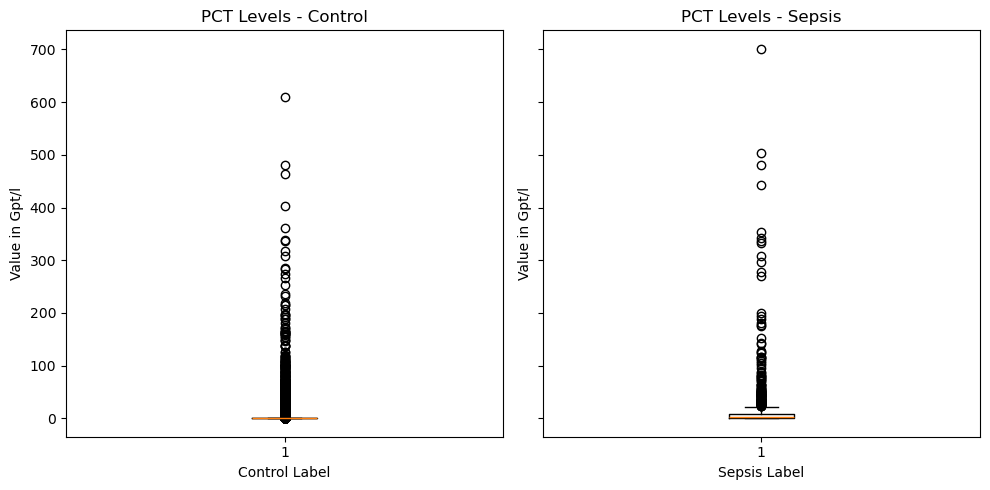

In [88]:
#Plot Sepsis and Control labels

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ax[0].boxplot(pct_values_control['PCT'])
ax[0].set_title("PCT Levels - Control")
ax[0].set_xlabel("Control Label")
ax[0].set_ylabel("Value in Gpt/l")


ax[1].boxplot(pct_values_sepsis['PCT'])
ax[1].set_title("PCT Levels - Sepsis")
ax[1].set_xlabel("Sepsis Label")
ax[1].set_ylabel("Value in Gpt/l")

plt.tight_layout()
plt.show()


Very difficult to tell anything from this - The PCT level distribution in both Sepsis and control skew right with tons 
of outliers on the high side. The sepsis distribution middle quartiles encompass some higher values but there isn't too much to go on
visually.

### <a id='toc5_12_5_'></a>[PLT](#toc0_)

Platelets in Tpt/l


Platelet count - Low means you may have an infection - high puts at risk of clots or stroke.
(https://my.clevelandclinic.org/health/diagnostics/21782-platelet-count)


This test is included in the CBC

In [89]:
#Looking at full data set
sbc_df_incl['PLT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1819435 entries, 0 to 1819434
Series name: PLT
Non-Null Count    Dtype  
--------------    -----  
1819435 non-null  float64
dtypes: float64(1)
memory usage: 13.9 MB


In [90]:
#Looking at full data set
sbc_df_incl['PLT'].describe()

count   1819435.00
mean        241.01
std         113.02
min           0.00
25%         178.00
50%         233.00
75%         294.00
max        3354.00
Name: PLT, dtype: float64

No null values but some outliers towards the high side.

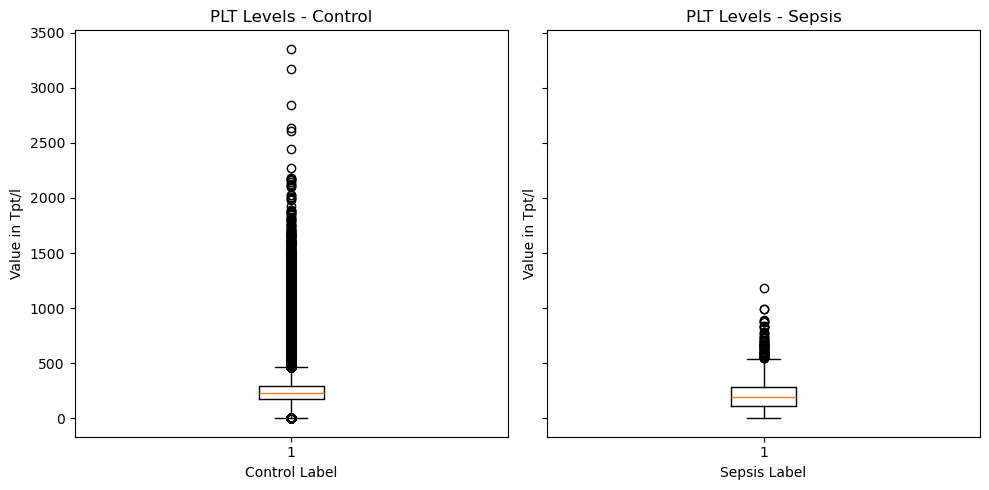

In [91]:
#Plot Sepsis and Control labels

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ax[0].boxplot(control_label_df['PLT'])
ax[0].set_title("PLT Levels - Control")
ax[0].set_xlabel("Control Label")
ax[0].set_ylabel("Value in Tpt/l")


ax[1].boxplot(sepsis_label_df['PLT'])
ax[1].set_title("PLT Levels - Sepsis")
ax[1].set_xlabel("Sepsis Label")
ax[1].set_ylabel("Value in Tpt/l")

plt.tight_layout()
plt.show()

Fewer outliers in the sepsis data, but the central tendency seems about the same. 
This could be an artifact of not having nearly as many Sepsis labeled data points. 

### <a id='toc5_12_6_'></a>[RBC](#toc0_)

Red blood count in Gpt/l 


Measures numbers of red blood cells - high = thicker blood and clots, low = anemia - anemia is associated with sepsis

This test is included in the CBC

In [92]:
#Looking at full data set
sbc_df_incl['RBC'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1819435 entries, 0 to 1819434
Series name: RBC
Non-Null Count    Dtype  
--------------    -----  
1819435 non-null  float64
dtypes: float64(1)
memory usage: 13.9 MB


In [93]:
#Looking at full data set
sbc_df_incl['RBC'].describe()

count   1819435.00
mean          4.06
std           0.82
min           0.10
25%           3.50
50%           4.17
75%           4.66
max           9.40
Name: RBC, dtype: float64

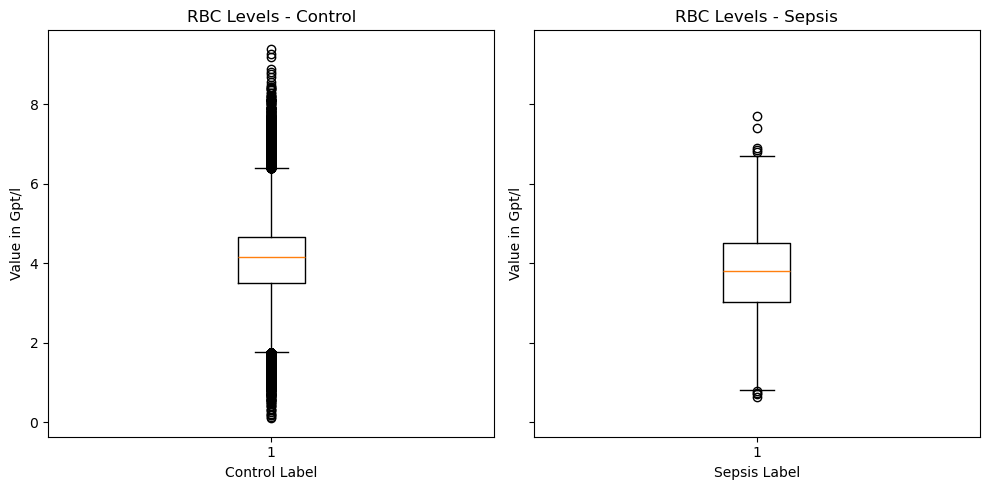

In [94]:
#Plot Sepsis and Control labels

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ax[0].boxplot(control_label_df['RBC'])
ax[0].set_title("RBC Levels - Control")
ax[0].set_xlabel("Control Label")
ax[0].set_ylabel("Value in Gpt/l")


ax[1].boxplot(sepsis_label_df['RBC'])
ax[1].set_title("RBC Levels - Sepsis")
ax[1].set_xlabel("Sepsis Label")
ax[1].set_ylabel("Value in Gpt/l")

plt.tight_layout()
plt.show()

Looks like basically the same distribution. There are fewer outliers in the Sepsis group,
but there is also just a lot less data for the sepsis group. 

### <a id='toc5_12_7_'></a>[WBC](#toc0_)

White blood count in ng/ml

A white blood cell (WBC) count measures the number of white blood cells in your blood. Low count means more vulnerable to infections. 
High means your body is fighting infections. (https://my.clevelandclinic.org/health/diseases/17704-high-white-blood-cell-count)

This test is included in the CBC

In [95]:
#Looking at full data set
sbc_df_incl['WBC'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1819435 entries, 0 to 1819434
Series name: WBC
Non-Null Count    Dtype  
--------------    -----  
1819435 non-null  float64
dtypes: float64(1)
memory usage: 13.9 MB


In [96]:
#Looking at full data set
sbc_df_incl['WBC'].describe()

count   1819435.00
mean          8.41
std           7.36
min           0.00
25%           5.70
50%           7.52
75%           9.99
max         951.60
Name: WBC, dtype: float64

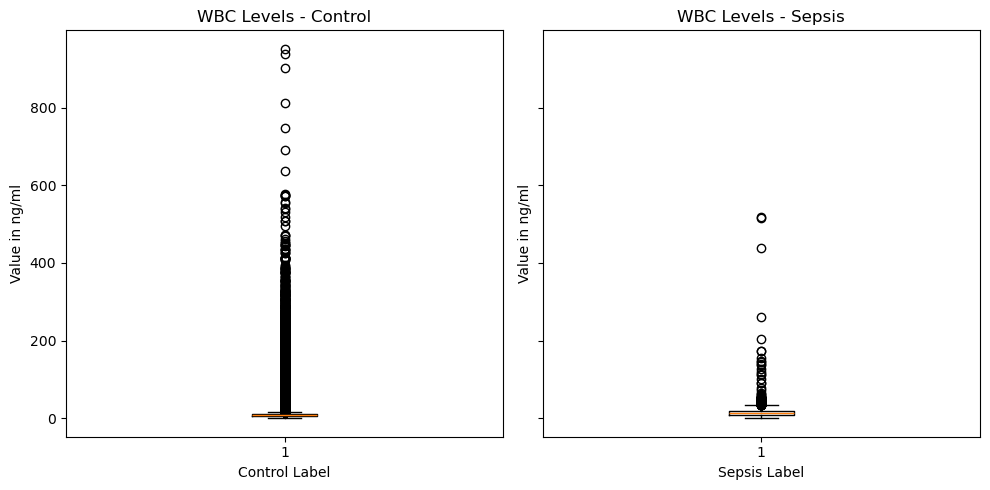

In [97]:
#Plot Sepsis and Control labels

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ax[0].boxplot(control_label_df['WBC'])
ax[0].set_title("WBC Levels - Control")
ax[0].set_xlabel("Control Label")
ax[0].set_ylabel("Value in ng/ml")


ax[1].boxplot(sepsis_label_df['WBC'])
ax[1].set_title("WBC Levels - Sepsis")
ax[1].set_xlabel("Sepsis Label")
ax[1].set_ylabel("Value in ng/ml")

plt.tight_layout()
plt.show()

Visually it looks like the central tendency in the Sepsis group contains higher values. 
Doesn't seem to be a massive difference, but it's hard to tell with all the outliers in both 
distributions. 

Let's run some statisitical tests to see how similar these distributions are.

In [98]:
from scipy.stats import mannwhitneyu, ks_2samp

control_WBC = control_label_df['WBC']
sepsis_WBC = sepsis_label_df['WBC']

# Perform Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(sepsis_WBC, control_WBC)

print(f"Mann-Whitney U Test: Statistic={u_statistic}, p-value={p_value}")

# Perform Kolmogorov-Smirnov Test
ks_statistic, p_value = ks_2samp(sepsis_WBC, control_WBC)
print(f"Kolmogorov-Smirnov Test: Statistic={ks_statistic}, p-value={p_value}")

Mann-Whitney U Test: Statistic=3213809205.5, p-value=1.0564905509770915e-306
Kolmogorov-Smirnov Test: Statistic=0.4134429309806008, p-value=0.0


Mann-Whitney U and Kolmogorov-Smirnov are both non-parametric and should be able to deal with the large n-differences between the two distributions. 
Looks like both tests incdicate that the distributiions are not the same. So the Sepsis labeled data is likely not just a
smaller version of the control data. Interesting. 

These tests could be applied to all the feature distributions here, but the main point is the performance of the model. 
I'll leave further stats tests out for now. They can be added later if they become more relevant. 

### <a id='toc5_12_8_'></a>[Blood Test Features - Pair Plots and Correlations](#toc0_)

In [99]:
sbc_df_incl.columns

Index(['Id', 'Age', 'Sex', 'Diagnosis', 'Center', 'Set', 'Sender', 'Episode',
       'Time', 'TargetIcu', 'SecToIcu', 'CRP', 'HGB', 'MCV', 'PCT', 'PLT',
       'RBC', 'WBC', 'Label'],
      dtype='object')

In [100]:
blood_test_df = sbc_df_incl[['CRP','HGB','MCV','PCT','PLT','RBC','WBC']]


In [101]:
blood_test_df.dtypes

CRP    float64
HGB    float64
MCV    float64
PCT    float64
PLT    float64
RBC    float64
WBC    float64
dtype: object

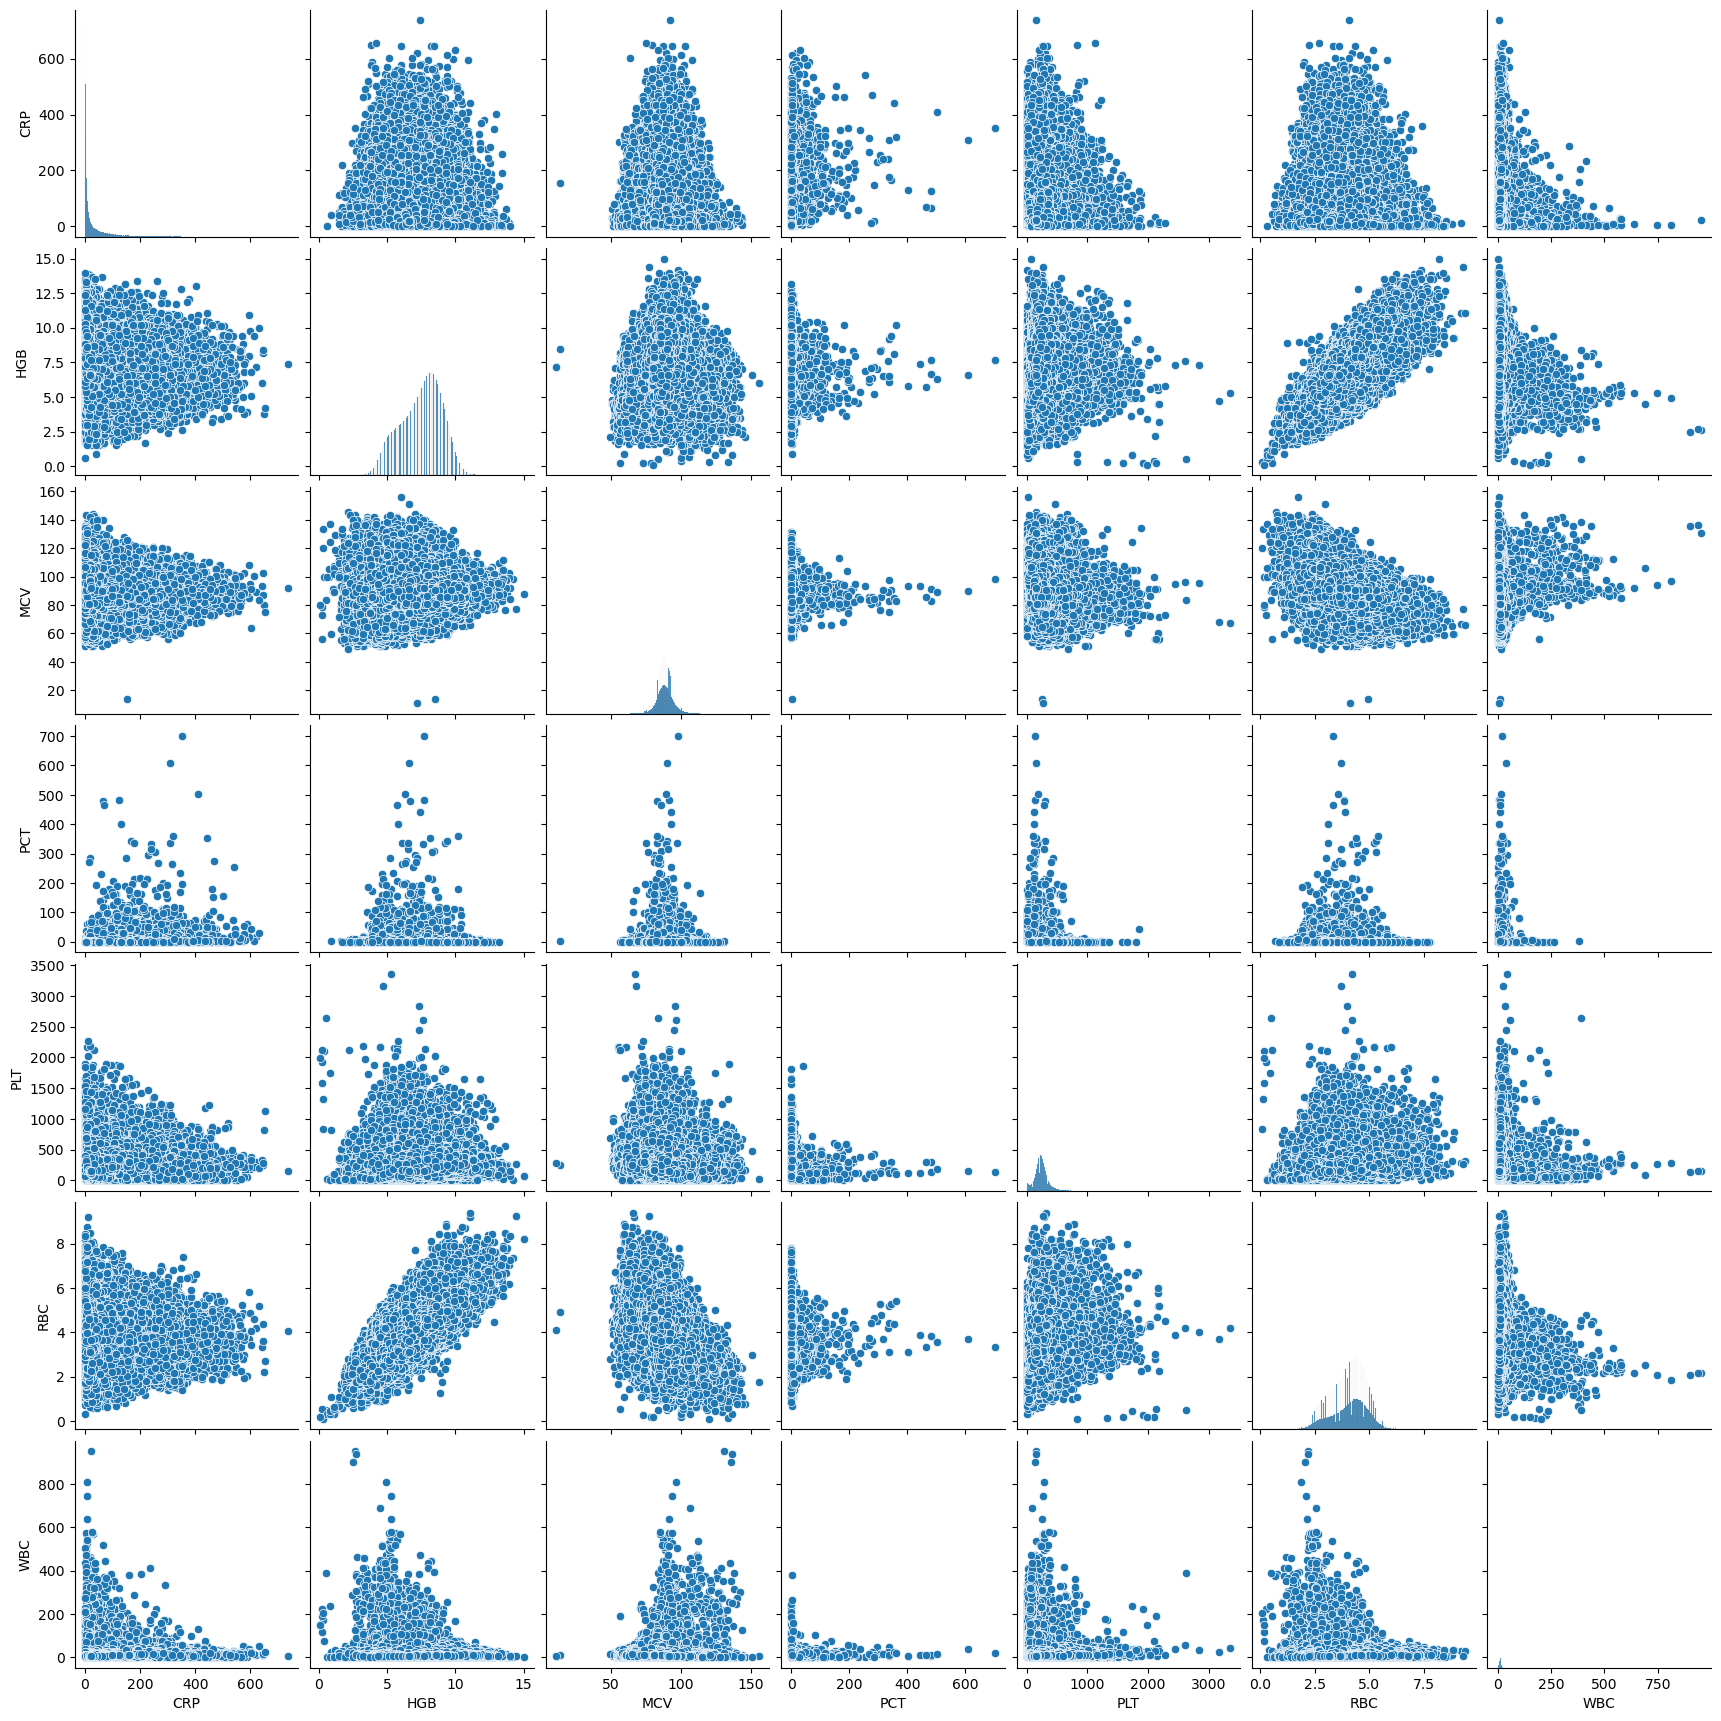

In [102]:
sns.pairplot(blood_test_df)



Not a lot of obvious correlation here. The one exception is RBC and HGB, which have a pretty obvious relationship. 

This makes sense because RBC is red blood count or the number of red blood cells and HGB is Hemoglobin, 
which is a protein that's a major component of red blood cells. More red blood cells = More Hemoglobin.

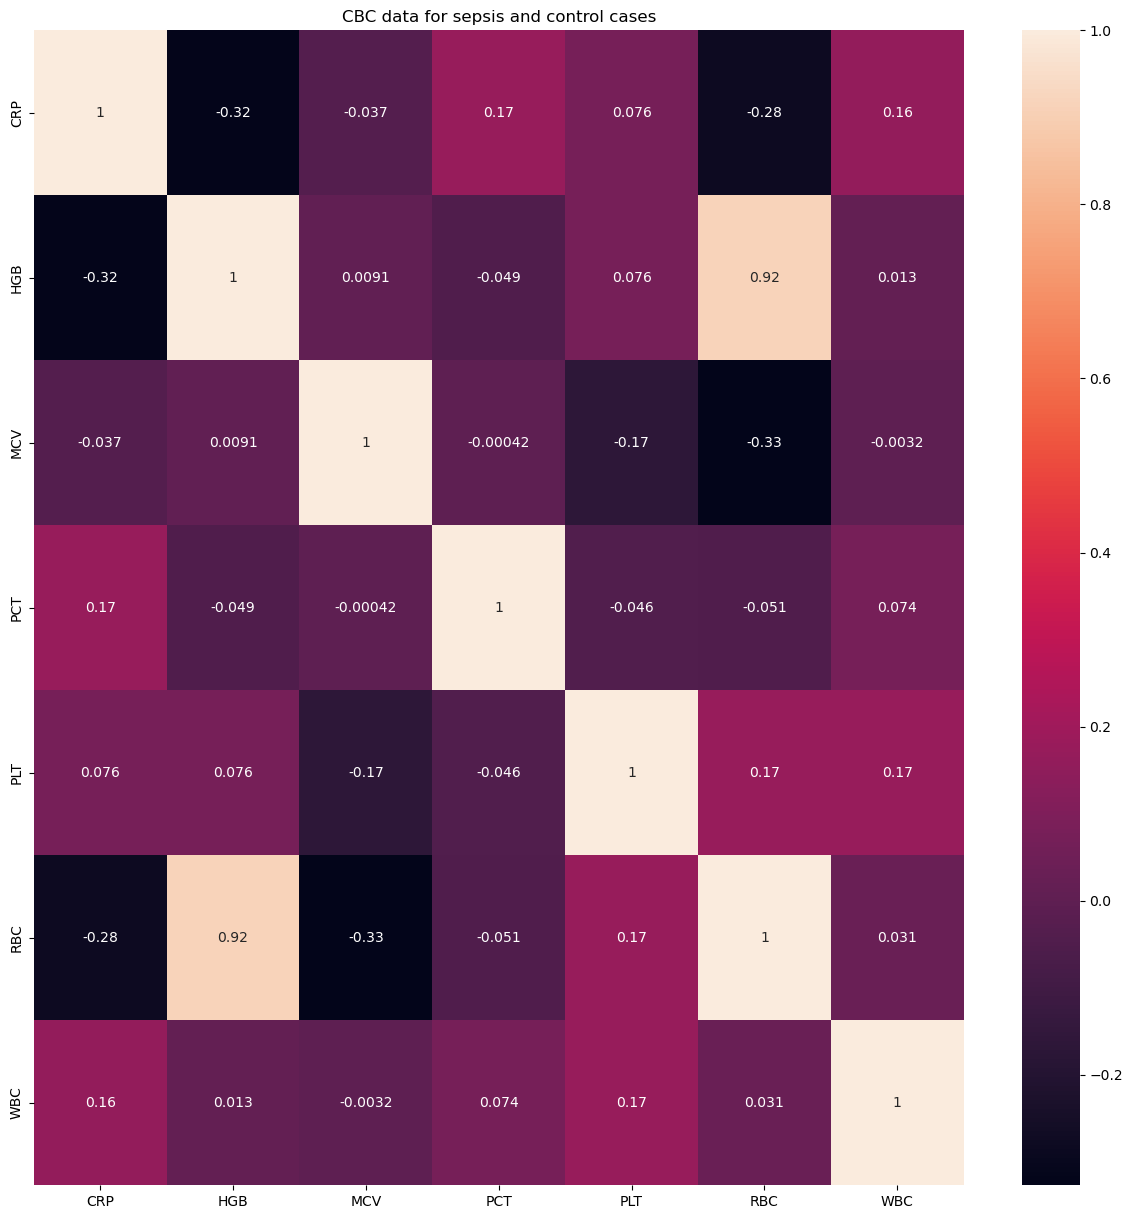

In [103]:
plt.figure(figsize = (15,15))
sns.heatmap(blood_test_df.corr(), annot= True)


plt.title('CBC data for sepsis and control cases')
plt.show()

The heatmaps just makes things clearer in terms of the lack of correlations. There is a very strong relationship between RBC and HGB,
but otherwise these blood tests are not linearly related in a meaningful way. 

## <a id='toc5_13_'></a>[Label](#toc0_)

The label feature is a categorical feature added by the data publishers. It shows which cases were used
as the sepsis class and which were used as the control class in their model. They are a good starting point, 
but as explored above, they reflect a 6 hour window from ICU admission. That may not be the best modeling
approach. 

In [104]:
sbc_df_incl['Label'].unique()

array(['Control', 'Sepsis'], dtype=object)

In [105]:
sbc_df_incl['Label'].value_counts()

Label
Control    1816971
Sepsis        2464
Name: count, dtype: int64

# <a id='toc6_'></a>[Final Data Processing](#toc0_)

## <a id='toc6_1_'></a>[Drop Uneeded Columns](#toc0_)

In [106]:
columns_to_drop = ['Sender','Episode','TargetIcu']

sbc_df_incl_cleaned = sbc_df_incl.drop(columns=columns_to_drop)

In [107]:
sbc_df_incl_cleaned.head()

,Id,Age,Sex,Diagnosis,Center,Set,Time,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label
0,1,25,W,Control,Greifswald,Validation,0.00,NaN,15.50,7.00,80.50,NaN,264.00,4.20,8.40,Control
1,2,75,M,Control,Greifswald,Validation,0.00,NaN,7.40,8.40,87.90,NaN,260.00,4.80,8.47,Control
2,4,69,M,Control,Greifswald,Validation,0.00,NaN,NaN,7.80,91.70,NaN,179.00,4.20,9.15,Control
3,5,88,W,Control,Greifswald,Validation,0.00,NaN,NaN,8.20,88.20,NaN,234.00,4.30,7.59,Control
4,6,75,M,Control,Greifswald,Validation,0.00,NaN,NaN,8.10,96.70,NaN,197.00,4.20,7.85,Control


## <a id='toc6_2_'></a>[Add new column for different time windows](#toc0_)

Below I'll add a new column for cases with a diagnosis of Sepsis that are outside the 6 hour window reflected in the raw data. 
The column is the number of hours before ICU admission the blood test was taken.

In [108]:
def sec_to_hours(seconds):
    hours = round(seconds/3600,2)
    return hours

In [109]:
sbc_df_incl_cleaned['HrsToIcu'] = sbc_df_incl_cleaned['SecToIcu'].apply(sec_to_hours)

In [110]:
sbc_df_incl_cleaned['HrsToIcu'].describe()

count   95298.00
mean      190.94
std       464.73
min         0.00
25%         6.08
50%        37.97
75%       183.00
max     11814.42
Name: HrsToIcu, dtype: float64

In [111]:
sepsis_cases = sbc_df_incl_cleaned[sbc_df_incl_cleaned['Label']== 'Sepsis']
print(len(sepsis_cases['HrsToIcu']))
sepsis_cases['HrsToIcu'].describe()

2464


count   2464.00
mean       2.75
std        1.56
min        0.00
25%        1.43
50%        2.60
75%        4.00
max        6.00
Name: HrsToIcu, dtype: float64

Looks good. All the cases labeled by the publishers as sepsis are labeled as being within the 6 hour window.
The number of cases makes sense as well. 

## <a id='toc6_3_'></a>[Save Wrangled Data](#toc0_)

In [112]:
sbc_df_incl_cleaned.to_csv('../data/processed/sbc_data_cleaned.csv', index = True)

# <a id='toc7_'></a>[Summary](#toc0_)

### <a id='toc7_1_1_'></a>[Basic Analysis](#toc0_)

The raw data set here consists of 2,709,568 rows. Of these 890,134 were labeled as excluded by the data publishers. The reasons for these exclusions were based on medical knowledge that is outside the scope of this project. All of the publishers excluded rows are also being excluded here. 

After exclusion, the data consists of 1,819,435 rows of data. All rows correspond to a set of blood tests from a patient. Every set of blood tests contains data for 5 tests that are included in a Complete Blood Count (CBC) which is a common set of tests. Two other blood tests are also provided in the data (CRP) and (PCT). Data from these tests is not included as part of the standard CBC and these features are null for many of the rows in the data. 63.7% of the data contains vales for the CRP feature and only 2% contains values for the PCT feature. Any modeling done with these features will have to take this into account. 

The data is further divided into two medical centers. Each of which was used to source some of the data.
The centers have unique id numbers for each patient, but the numbers are not totally unique, they repeat in each center. So each center has a patient ID 1, 2, etc. But the patients indicated by those ID’s are different people.

Further, each row corresponds to a blood test, but not to a unique patient. There are 1819435 cases in the data set but there are only 723,681 unique patients. 
This means that a lot of the data is made up of blood tests taken from the same patients over time. 
This raises some interesting possibilities for time series analysis of bloodwork.  

In the Leipzig data 210,310 patient Ids appear more than once.
That is 29.68% of the total Ids for this center

In the Greifswald data 85,956 patient Ids appear more than once
That is 54.43% of the total Ids for this center. 

Most cases still have only one CBC in the data, but the repeated tests for other patients mean that any factors unique to those patients could have an outsized effect in a model. 
Some patients even have hundreds of blood tests, starting months before ICU admission and leading right up to ICU admission. This is very rare in the data, but seems important to note. 

### <a id='toc7_1_2_'></a>[Blood Test Data and units](#toc0_)

The data for the blood tests in the data is complete for the CBC's but each test is in a separate unit of measurement.
Some of these units are esoteric and medical in nature. If modeling approaches require the data to be on the same scale,
then this may become an important factor. The scales are different for all the tests and the units are different.

### <a id='toc7_1_3_'></a>[Class Labels and Imbalance](#toc0_)

In terms of class labels, the data has been labeled by the publishers as either Sepsis or Control.

These labels reflect the modeling process of the previous work done with this data. 
The Sepsis labeled group is limited to CBCs that were taken within a 6 hour window before ICU admission. This window could potentially be expanded to include a longer time frame before ICU admission. Increasing the window would provide more data for training, but may also degrade model performance by introducing additional noise. Ultimately, it makes sense to try a variety of windows and see which yields the best results. See the ‘Diagnosis’ Feature analysis above for more detail on how changing the time window might change the labels. 

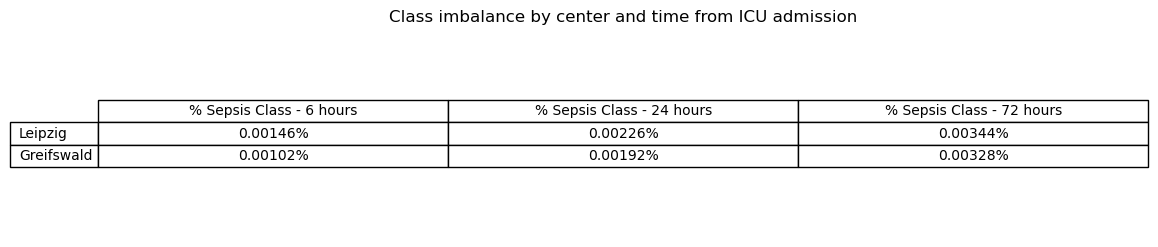

In [113]:
# Define the table data
data = [
    ['0.00146%', '0.00226%', '0.00344%'],
    ['0.00102%', '0.00192%', '0.00328%']
]
# Define the table headers
column_labels = ["% Sepsis Class - 6 hours", "% Sepsis Class - 24 hours", "% Sepsis Class - 72 hours"]
row_labels = ["Leipzig", "Greifswald"]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 3))

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=data, colLabels=column_labels, rowLabels=row_labels, cellLoc='center', loc='center')
table.scale(1.5, 1.5)

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.2, top=0.8)

plt.title('Class imbalance by center and time from ICU admission')

# Display the table
plt.show()

Regardless of the time window chosen, the class imbalance is in the data is extreme. 
Leipzig has 2016 cases labeled sepsis and 1379342 cases labeled as control.
Greifswald has 448 cases labeled sepsis and 437629 cases labeled as control

The imbalance is broken down below by center, with various time windows from ICU admission provided to see the effect on the imbalances. In all cases, the class we’re trying to find, the Sepsis class, is well under 1% of the data. This will be one of the main challenges when modeling the data in the following notebooks.